In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel(r'WoDevMea.xlsx',sheet_name='world_development')

In [4]:
#Let us view the data points.
data.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

<b><h1>EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
#Data types of the given data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

<b><h3>GDP, Helath Exp/Capita, Tourism inbound and outbound are mentioned as objects but as to be converted into numerical further

In [6]:
#Number of empty rows present in the respective columns
data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

<b><h3>Only Country,Number of records and total population columns does not contain any empty rows in them.

<b><h1>DATA CLEANING

In [7]:
data.shape

(2704, 25)

Columns,<br>
Bussiness Tax rate has 47% Null records<br>
Ease of Bussiness has 93% Null records<br>
Hours to do tax has 48% Null records<br>
we can drop these columns.

In [8]:
data_2 = data.drop(['Business Tax Rate','Ease of Business','Hours to do Tax'],axis=1)
data_2

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                  GDP  \
0                        NaN       26998.0      $54,790,058,957   
1                        NaN        7499.0       $9,129,594,819   
2                        NaN        1983.0       $2,359,122,303   
3                        NaN        1836.0       $5,788,311,645   
4                        NaN           NaN       $2,610,959,139   
...                      ...           ...                  ...   
2699                     NaN           NaN                  NaN   
2700                     5.0     2132446.0  $16,244,600,000,000   
2701                     7.0           NaN      $50,004,354,667   
2702                   144.0           NaN     $381,286,223,859   
2703                     NaN           NaN                  NaN   

      Health Exp % GDP Health Exp/Capita  Infant Mortality Rate  \
0                0.035               $60                  0.034   
1                0.034               $22                  0.128   
2                0.043               $15                  0.090   
3                0.047              $152                  0.054   
4                0.051               $12                  0.096   
...                ...               ...                    ...   
2699               NaN               NaN                    NaN   
2700             0.179            $8,895                  0.006   
2701             0.089            $1,308                  0.010   
2702             0.046              $593                  0.013   
2703               NaN               NaN                    NaN   

      Internet Usage  ...  Life Expectancy Male  Mobile Phone Usage  \
0                0.0  ...                  67.0                 0.0   
1                0.0  ...                  44.0                 0.0   
2                0.0  ...                  53.0                 0.0   
3                0.0  ...                  49.0                 0.1   
4                0.0  ...                  49.0                 0.0   
...              ...  ...                   ...                 ...   
2699             NaN  ...                   NaN                 NaN   
2700             0.8  ...                  76.0                 1.0   
2701             0.5  ...                  74.0                 1.5   
2702             0.5  ...                  72.0                 1.0   
2703             0.4  ...                  76.0                 NaN   

      Number of Records  Population 0-14  Population 15-64  Population 65+  \
0                     1            0.342             0.619           0.039   
1                     1            0.476             0.499           0.025   
2                     1            0.454             0.517           0.029   
3                     1            0.383             0.587           0.029   
4                     1            0.468             0.505           0.028   
...                 ...              ...               ...             ...   
2699                  1              NaN               NaN             NaN   
2700                  1            0.196             0.667           0.136   
2701                  1            0.220             0.639           0.140   
2702                  1       

In [9]:
#Let us remove the '$' sign from the columns
for i in data_2[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']]:
    data_2[i] = data_2[i].str.replace('$','')
data_2

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                 GDP  \
0                        NaN       26998.0      54,790,058,957   
1                        NaN        7499.0       9,129,594,819   
2                        NaN        1983.0       2,359,122,303   
3                        NaN        1836.0       5,788,311,645   
4                        NaN           NaN       2,610,959,139   
...                      ...           ...                 ...   
2699                     NaN           NaN                 NaN   
2700                     5.0     2132446.0  16,244,600,000,000   
2701                     7.0           NaN      50,004,354,667   
2702                   144.0           NaN     381,286,223,859   
2703                     NaN           NaN                 NaN   

      Health Exp % GDP Health Exp/Capita  Infant Mortality Rate  \
0                0.035                60                  0.034   
1                0.034                22                  0.128   
2                0.043                15                  0.090   
3                0.047               152                  0.054   
4                0.051                12                  0.096   
...                ...               ...                    ...   
2699               NaN               NaN                    NaN   
2700             0.179             8,895                  0.006   
2701             0.089             1,308                  0.010   
2702             0.046               593                  0.013   
2703               NaN               NaN                    NaN   

      Internet Usage  ...  Life Expectancy Male  Mobile Phone Usage  \
0                0.0  ...                  67.0                 0.0   
1                0.0  ...                  44.0                 0.0   
2                0.0  ...                  53.0                 0.0   
3                0.0  ...                  49.0                 0.1   
4                0.0  ...                  49.0                 0.0   
...              ...  ...                   ...                 ...   
2699             NaN  ...                   NaN                 NaN   
2700             0.8  ...                  76.0                 1.0   
2701             0.5  ...                  74.0                 1.5   
2702             0.5  ...                  72.0                 1.0   
2703             0.4  ...                  76.0                 NaN   

      Number of Records  Population 0-14  Population 15-64  Population 65+  \
0                     1            0.342             0.619           0.039   
1                     1            0.476             0.499           0.025   
2                     1            0.454             0.517           0.029   
3                     1            0.383             0.587           0.029   
4                     1            0.468             0.505           0.028   
...                 ...              ...               ...             ...   
2699                  1              NaN               NaN             NaN   
2700                  1            0.196             0.667           0.136   
2701                  1            0.220             0.639           0.140   
2702                  1            0.288  

In [10]:
#Let's convert the above columns datatype to numerical
for i in data_2[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']]:
    data_2[i] = data_2[i].str.replace(',','').astype(float)
data_2

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0                  60.0                  0.034             0.0  ...   
1                  22.0                  0.128             0.0  ...   
2                  15.0                  0.090             0.0  ...   
3                 152.0                  0.054             0.0  ...   
4                  12.0                  0.096             0.0  ...   
...                 ...                    ...             ...  ...   
2699                NaN                    NaN             NaN  ...   
2700             8895.0                  0.006             0.8  ...   
2701             1308.0                  0.010             0.5  ...   
2702              593.0                  0.013             0.5  ...   
2703                NaN                    NaN             0.4  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
2700            0.196             0.66

In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  1718 non-null   float64
 4   Energy Usage            1785 non-null   float64
 5   GDP                     2494 non-null   float64
 6   Health Exp % GDP        2395 non-null   float64
 7   Health Exp/Capita       2395 non-null   float64
 8   Infant Mortality Rate   2444 non-null   float64
 9   Internet Usage          2531 non-null   float64
 10  Lending Interest        1880 non-null   float64
 11  Life Expectancy Female  2568 non-null   float64
 12  Life Expectancy Male    2568 non-null   float64
 13  Mobile Phone Usage      2537 non-null   float64
 14  Number of Records       2704 non-null   

In [12]:
#lets fill the empty records in the data set,
filler = data_2.drop(['Country','Number of Records','Population Total'],axis=1)
filler

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0          0.020        87931.0                     NaN       26998.0   
1          0.050         9542.0                     NaN        7499.0   
2          0.043         1617.0                     NaN        1983.0   
3          0.027         4276.0                     NaN        1836.0   
4          0.046         1041.0                     NaN           NaN   
...          ...            ...                     ...           ...   
2699         NaN            NaN                     NaN           NaN   
2700       0.013            NaN                     5.0     2132446.0   
2701       0.015            NaN                     7.0           NaN   
2702       0.020            NaN                   144.0           NaN   
2703       0.011            NaN                     NaN           NaN   

               GDP  Health Exp % GDP  Health Exp/Capita  \
0     5.479006e+10             0.035               60.0   
1     9.129595e+09             0.034               22.0   
2     2.359122e+09             0.043               15.0   
3     5.788312e+09             0.047              152.0   
4     2.610959e+09             0.051               12.0   
...            ...               ...                ...   
2699           NaN               NaN                NaN   
2700  1.624460e+13             0.179             8895.0   
2701  5.000435e+10             0.089             1308.0   
2702  3.812862e+11             0.046              593.0   
2703           NaN               NaN                NaN   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0               NaN   
3                     0.054             0.0             0.155   
4                     0.096             0.0               NaN   
...                     ...             ...               ...   
2699                    NaN             NaN               NaN   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                    NaN             0.4               NaN   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 NaN   

      Population 0-14  Population 15-64  Population 65+  Population Urban  \
0               0.342             0.619           0.039             0.599   
1               0.476             0.499           0.025             0.324   
2               0.454             0.517           0.029             0.383   
3               0.383             0.587           0.029             0.532   
4               0.468             0.505           0.028             0.178   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             0.911   
2700            0.196             0.667           0.136             0.811   
2701            0.220             0.639           0.140  

In [13]:
for i in filler[['Birth Rate','Health Exp % GDP','Population 0-14','Population 15-64','Population Urban']]:
    filler[i].fillna(filler[i].mean(),inplace=True)
filler

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.020000        87931.0                     NaN       26998.0   
1       0.050000         9542.0                     NaN        7499.0   
2       0.043000         1617.0                     NaN        1983.0   
3       0.027000         4276.0                     NaN        1836.0   
4       0.046000         1041.0                     NaN           NaN   
...          ...            ...                     ...           ...   
2699    0.022715            NaN                     NaN           NaN   
2700    0.013000            NaN                     5.0     2132446.0   
2701    0.015000            NaN                     7.0           NaN   
2702    0.020000            NaN                   144.0           NaN   
2703    0.011000            NaN                     NaN           NaN   

               GDP  Health Exp % GDP  Health Exp/Capita  \
0     5.479006e+10           0.03500               60.0   
1     9.129595e+09           0.03400               22.0   
2     2.359122e+09           0.04300               15.0   
3     5.788312e+09           0.04700              152.0   
4     2.610959e+09           0.05100               12.0   
...            ...               ...                ...   
2699           NaN           0.06417                NaN   
2700  1.624460e+13           0.17900             8895.0   
2701  5.000435e+10           0.08900             1308.0   
2702  3.812862e+11           0.04600              593.0   
2703           NaN           0.06417                NaN   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0               NaN   
3                     0.054             0.0             0.155   
4                     0.096             0.0               NaN   
...                     ...             ...               ...   
2699                    NaN             NaN               NaN   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                    NaN             0.4               NaN   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 NaN   

      Population 0-14  Population 15-64  Population 65+  Population Urban  \
0            0.342000          0.619000           0.039             0.599   
1            0.476000          0.499000           0.025             0.324   
2            0.454000          0.517000           0.029             0.383   
3            0.383000          0.587000           0.029             0.532   
4            0.468000          0.505000           0.028             0.178   
...               ...               ...             ...               ...   
2699         0.303051          0.623481             NaN             0.911   
2700         0.196000          0.667000           0.136             0.811   
2701         0.220000          0.639000           0.140  

In [14]:
for i in filler[['CO2 Emissions','Days to Start Business','Energy Usage','GDP','Health Exp/Capita','Infant Mortality Rate',
                 'Internet Usage', 'Lending Interest', 'Life Expectancy Female','Life Expectancy Male', 'Mobile Phone Usage',
                 'Population 65+','Tourism Inbound', 'Tourism Outbound']]:
    filler[i].fillna(filler[i].median(),inplace=True)
filler

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.020000        87931.0                    26.0       26998.0   
1       0.050000         9542.0                    26.0        7499.0   
2       0.043000         1617.0                    26.0        1983.0   
3       0.027000         4276.0                    26.0        1836.0   
4       0.046000         1041.0                    26.0       14338.0   
...          ...            ...                     ...           ...   
2699    0.022715         8529.0                    26.0       14338.0   
2700    0.013000         8529.0                     5.0     2132446.0   
2701    0.015000         8529.0                     7.0       14338.0   
2702    0.020000         8529.0                   144.0       14338.0   
2703    0.011000         8529.0                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  \
0     5.479006e+10           0.03500               60.0   
1     9.129595e+09           0.03400               22.0   
2     2.359122e+09           0.04300               15.0   
3     5.788312e+09           0.04700              152.0   
4     2.610959e+09           0.05100               12.0   
...            ...               ...                ...   
2699  1.507975e+10           0.06417              193.0   
2700  1.624460e+13           0.17900             8895.0   
2701  5.000435e+10           0.08900             1308.0   
2702  3.812862e+11           0.04600              593.0   
2703  1.507975e+10           0.06417              193.0   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0             0.120   
3                     0.054             0.0             0.155   
4                     0.096             0.0             0.120   
...                     ...             ...               ...   
2699                  0.020             0.1             0.120   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                  0.020             0.4             0.120   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                    75.0                  69.0                 0.5   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 0.5   

      Population 0-14  Population 15-64  Population 65+  Population Urban  \
0            0.342000          0.619000           0.039             0.599   
1            0.476000          0.499000           0.025             0.324   
2            0.454000          0.517000           0.029             0.383   
3            0.383000          0.587000           0.029             0.532   
4            0.468000          0.505000           0.028             0.178   
...               ...               ...             ...               ...   
2699         0.303051          0.623481           0.052             0.911   
2700         0.196000          0.667000           0.136             0.811   
2701         0.220000          0.639000           0.140  

In [15]:
filler.isnull().sum()

Birth Rate                0
CO2 Emissions             0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

<b>There are no empty rows in the data set

In [16]:
concat = data_2[['Country','Number of Records','Population Total']]
concat

Country  Number of Records  Population Total
0                      Algeria                  1          31719449
1                       Angola                  1          13924930
2                        Benin                  1           6949366
3                     Botswana                  1           1755375
4                 Burkina Faso                  1          11607944
...                        ...                ...               ...
2699  Turks and Caicos Islands                  1             32427
2700             United States                  1         313873685
2701                   Uruguay                  1           3395253
2702             Venezuela, RB                  1          29954782
2703     Virgin Islands (U.S.)                  1            105275

[2704 rows x 3 columns]

In [17]:
data_3 = pd.concat([concat,filler],axis=1)
data_3

Country  Number of Records  Population Total  \
0                      Algeria                  1          31719449   
1                       Angola                  1          13924930   
2                        Benin                  1           6949366   
3                     Botswana                  1           1755375   
4                 Burkina Faso                  1          11607944   
...                        ...                ...               ...   
2699  Turks and Caicos Islands                  1             32427   
2700             United States                  1         313873685   
2701                   Uruguay                  1           3395253   
2702             Venezuela, RB                  1          29954782   
2703     Virgin Islands (U.S.)                  1            105275   

      Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0       0.020000        87931.0                    26.0       26998.0   
1       0.050000         9542.0                    26.0        7499.0   
2       0.043000         1617.0                    26.0        1983.0   
3       0.027000         4276.0                    26.0        1836.0   
4       0.046000         1041.0                    26.0       14338.0   
...          ...            ...                     ...           ...   
2699    0.022715         8529.0                    26.0       14338.0   
2700    0.013000         8529.0                     5.0     2132446.0   
2701    0.015000         8529.0                     7.0       14338.0   
2702    0.020000         8529.0                   144.0       14338.0   
2703    0.011000         8529.0                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  ...  \
0     5.479006e+10           0.03500               60.0  ...   
1     9.129595e+09           0.03400               22.0  ...   
2     2.359122e+09           0.04300               15.0  ...   
3     5.788312e+09           0.04700              152.0  ...   
4     2.610959e+09           0.05100               12.0  ...   
...            ...               ...                ...  ...   
2699  1.507975e+10           0.06417              193.0  ...   
2700  1.624460e+13           0.17900             8895.0  ...   
2701  5.000435e+10           0.08900             1308.0  ...   
2702  3.812862e+11           0.04600              593.0  ...   
2703  1.507975e+10           0.06417              193.0  ...   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                    0.0         0.342000          0.619000           0.039   
1                    0.0         0.476000          0.499000           0.025   
2                    0.0         0.454000          0.517000           0.029   
3                    0.1         0.383000          0.587000           0.029   
4                    0.0         0.468000          0.505000           0.028   
...                  ...              ...               ...             ...   
2699                 0.5         0.303051          0.623481           0.052   
2700                 1.0   

In [18]:
data_3['Number of Records'].value_counts()

1    2704
Name: Number of Records, dtype: int64

<b>Column 'Number of records' has only one entry i.e '1',which is not a significant variable and will not effect our model.Therefore we can drop it

In [19]:
data_4 = data_3.drop(['Number of Records'],axis=1)
data_4

Country  Population Total  Birth Rate  CO2 Emissions  \
0                      Algeria          31719449    0.020000        87931.0   
1                       Angola          13924930    0.050000         9542.0   
2                        Benin           6949366    0.043000         1617.0   
3                     Botswana           1755375    0.027000         4276.0   
4                 Burkina Faso          11607944    0.046000         1041.0   
...                        ...               ...         ...            ...   
2699  Turks and Caicos Islands             32427    0.022715         8529.0   
2700             United States         313873685    0.013000         8529.0   
2701                   Uruguay           3395253    0.015000         8529.0   
2702             Venezuela, RB          29954782    0.020000         8529.0   
2703     Virgin Islands (U.S.)            105275    0.011000         8529.0   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                       26.0       26998.0  5.479006e+10           0.03500   
1                       26.0        7499.0  9.129595e+09           0.03400   
2                       26.0        1983.0  2.359122e+09           0.04300   
3                       26.0        1836.0  5.788312e+09           0.04700   
4                       26.0       14338.0  2.610959e+09           0.05100   
...                      ...           ...           ...               ...   
2699                    26.0       14338.0  1.507975e+10           0.06417   
2700                     5.0     2132446.0  1.624460e+13           0.17900   
2701                     7.0       14338.0  5.000435e+10           0.08900   
2702                   144.0       14338.0  3.812862e+11           0.04600   
2703                    26.0       14338.0  1.507975e+10           0.06417   

      Health Exp/Capita  Infant Mortality Rate  ...  Lending Interest  \
0                  60.0                  0.034  ...             0.100   
1                  22.0                  0.128  ...             1.032   
2                  15.0                  0.090  ...             0.120   
3                 152.0                  0.054  ...             0.155   
4                  12.0                  0.096  ...             0.120   
...                 ...                    ...  ...               ...   
2699              193.0                  0.020  ...             0.120   
2700             8895.0                  0.006  ...             0.033   
2701             1308.0                  0.010  ...             0.112   
2702              593.0                  0.013  ...             0.164   
2703              193.0                  0.020  ...             0.120   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                    75.0                  69.0                 0.5   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 0.5   

      Population 0-14  Population 15-64  Population 65+  Population Urban  \
0            0.342000          0.619000           0.039             0.599   
1            0.476000          0.499000           0.025             0.324   
2            0.454000          0.517000           0.029             0.383   
3            0.383000          0.587000           0.029        

<b><h1>VISUALIZATIONS

<b><h2>1.Boxplot

In [20]:
visual = data_4.drop(['Country'],axis=1)
visual

Population Total  Birth Rate  CO2 Emissions  Days to Start Business  \
0             31719449    0.020000        87931.0                    26.0   
1             13924930    0.050000         9542.0                    26.0   
2              6949366    0.043000         1617.0                    26.0   
3              1755375    0.027000         4276.0                    26.0   
4             11607944    0.046000         1041.0                    26.0   
...                ...         ...            ...                     ...   
2699             32427    0.022715         8529.0                    26.0   
2700         313873685    0.013000         8529.0                     5.0   
2701           3395253    0.015000         8529.0                     7.0   
2702          29954782    0.020000         8529.0                   144.0   
2703            105275    0.011000         8529.0                    26.0   

      Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0          26998.0  5.479006e+10           0.03500               60.0   
1           7499.0  9.129595e+09           0.03400               22.0   
2           1983.0  2.359122e+09           0.04300               15.0   
3           1836.0  5.788312e+09           0.04700              152.0   
4          14338.0  2.610959e+09           0.05100               12.0   
...            ...           ...               ...                ...   
2699       14338.0  1.507975e+10           0.06417              193.0   
2700     2132446.0  1.624460e+13           0.17900             8895.0   
2701       14338.0  5.000435e+10           0.08900             1308.0   
2702       14338.0  3.812862e+11           0.04600              593.0   
2703       14338.0  1.507975e+10           0.06417              193.0   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0             0.120   
3                     0.054             0.0             0.155   
4                     0.096             0.0             0.120   
...                     ...             ...               ...   
2699                  0.020             0.1             0.120   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                  0.020             0.4             0.120   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                    75.0                  69.0                 0.5   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 0.5   

      Population 0-14  Population 15-64  Population 65+  Population Urban  \
0            0.342000          0.619000           0.039             0.599   
1            0.476000          0.499000           0.025             0.324   
2            0.454000          0.517000           0.029             0.383   
3            0.383000          0.587000           0.029             0.532   
4            0.468000          0.505000           0.028             0.178   
...               ...               ...             ...               ..

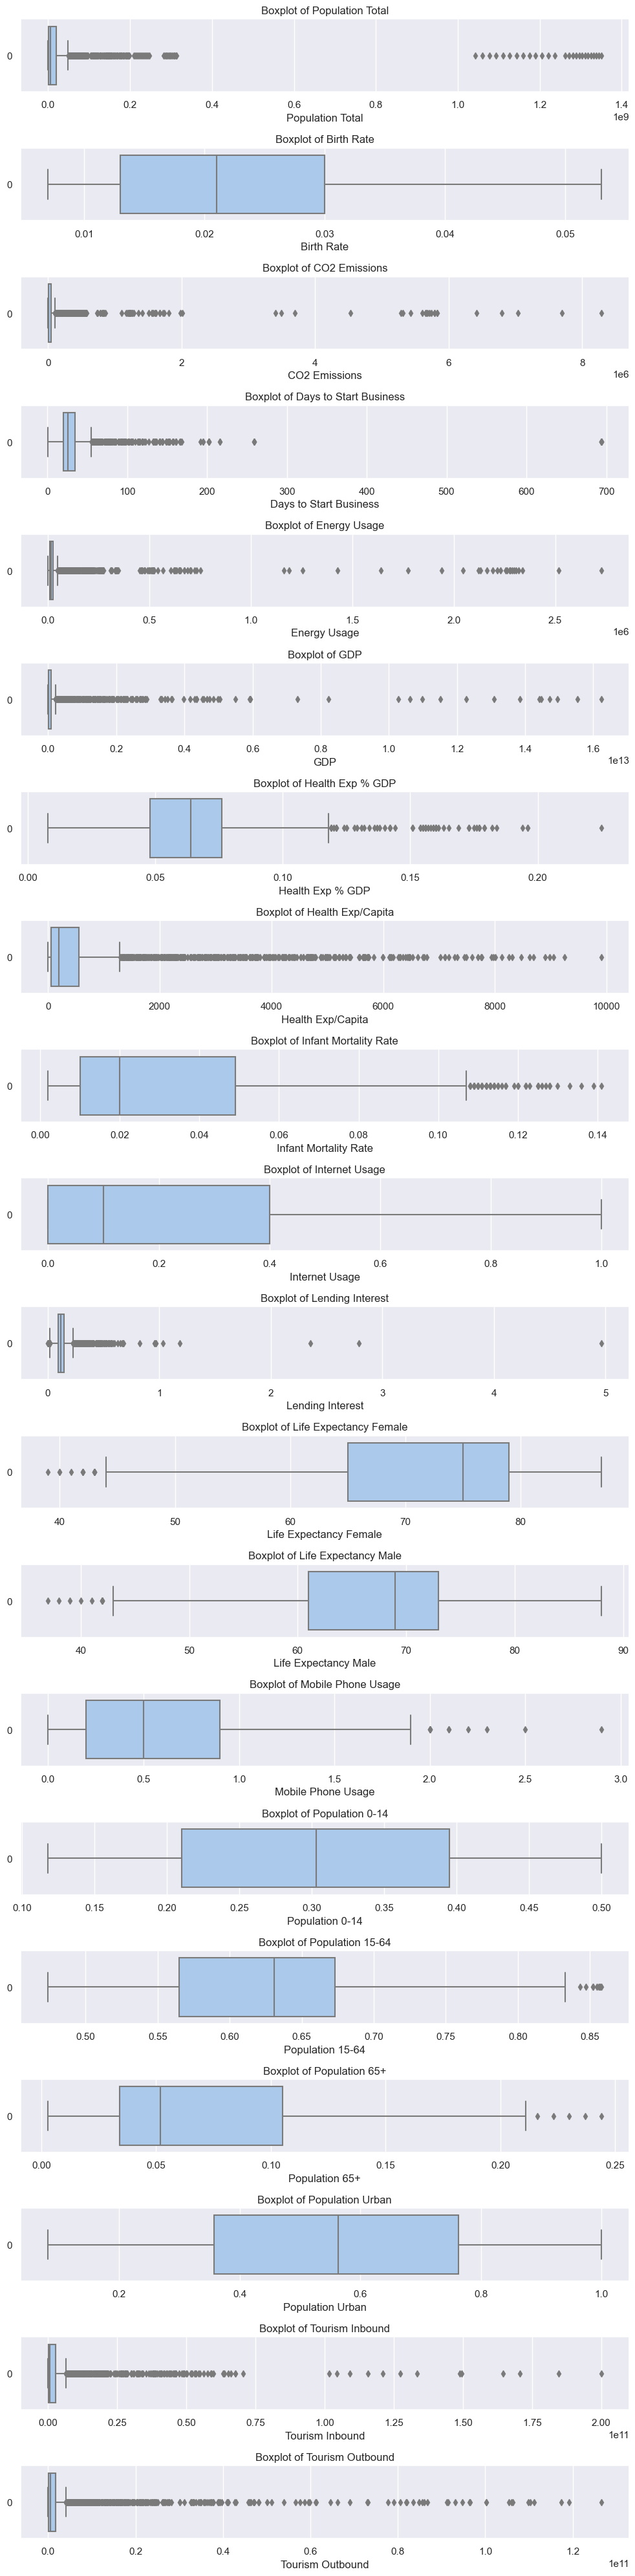

In [21]:
plt.figure(figsize=(10,40))
for i,cols in enumerate(visual,start=1):
    plt.subplot(20,1,i)
    sns.boxplot(visual[cols],orient='h',palette='pastel')
    plt.xlabel(cols)
    plt.title(f'Boxplot of {cols}')
plt.tight_layout()
plt.show()

<b>There are significant amount of outliers present in the data. Since Clustering Alogirithm are not effected by presence of outliers let us just keep them.

<b><h2>2.Distribution Plot

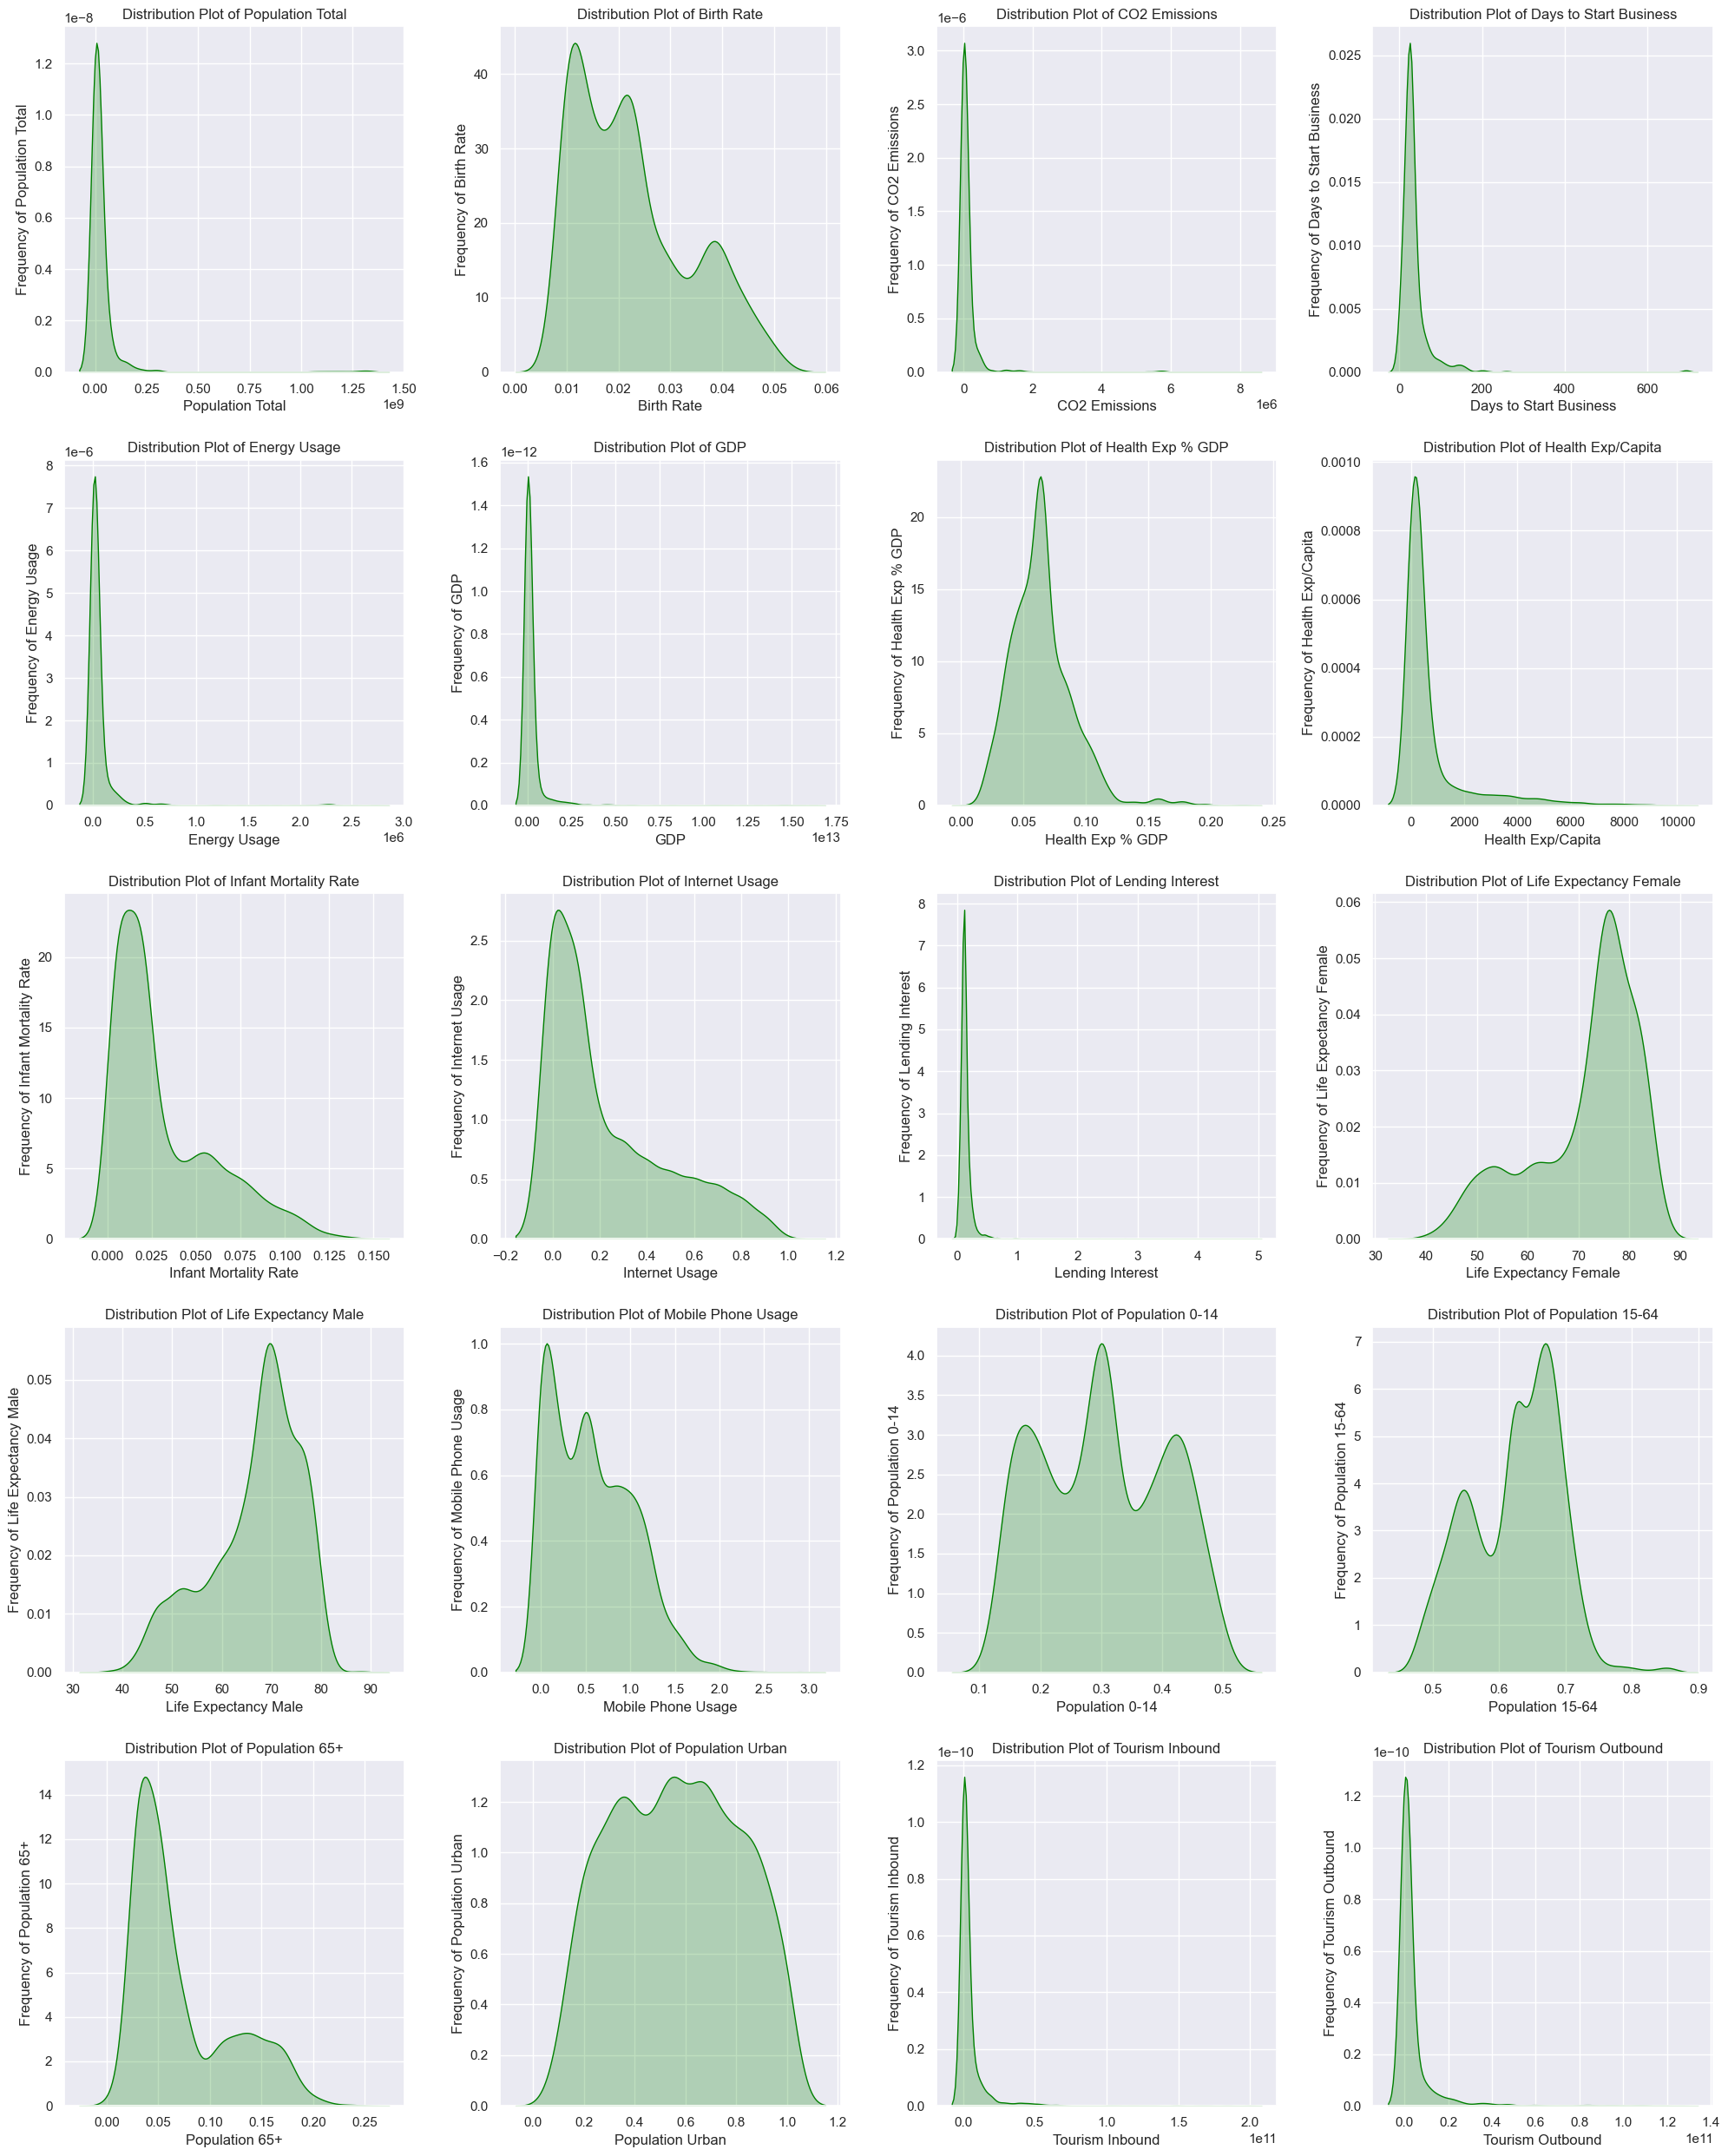

In [22]:
plt.figure(figsize=(20,25))
for i,cols in enumerate(visual,start=1):
    plt.subplot(5,4,i)
    sns.kdeplot(visual[cols],color='green',fill=True)
    plt.xlabel(cols)
    plt.ylabel(f'Frequency of {cols}')
    plt.title(f'Distribution Plot of {cols}')
plt.tight_layout()
plt.show()

<b>'Health Exp % GDP','Population 0-14','Population Urban' are normally distributed

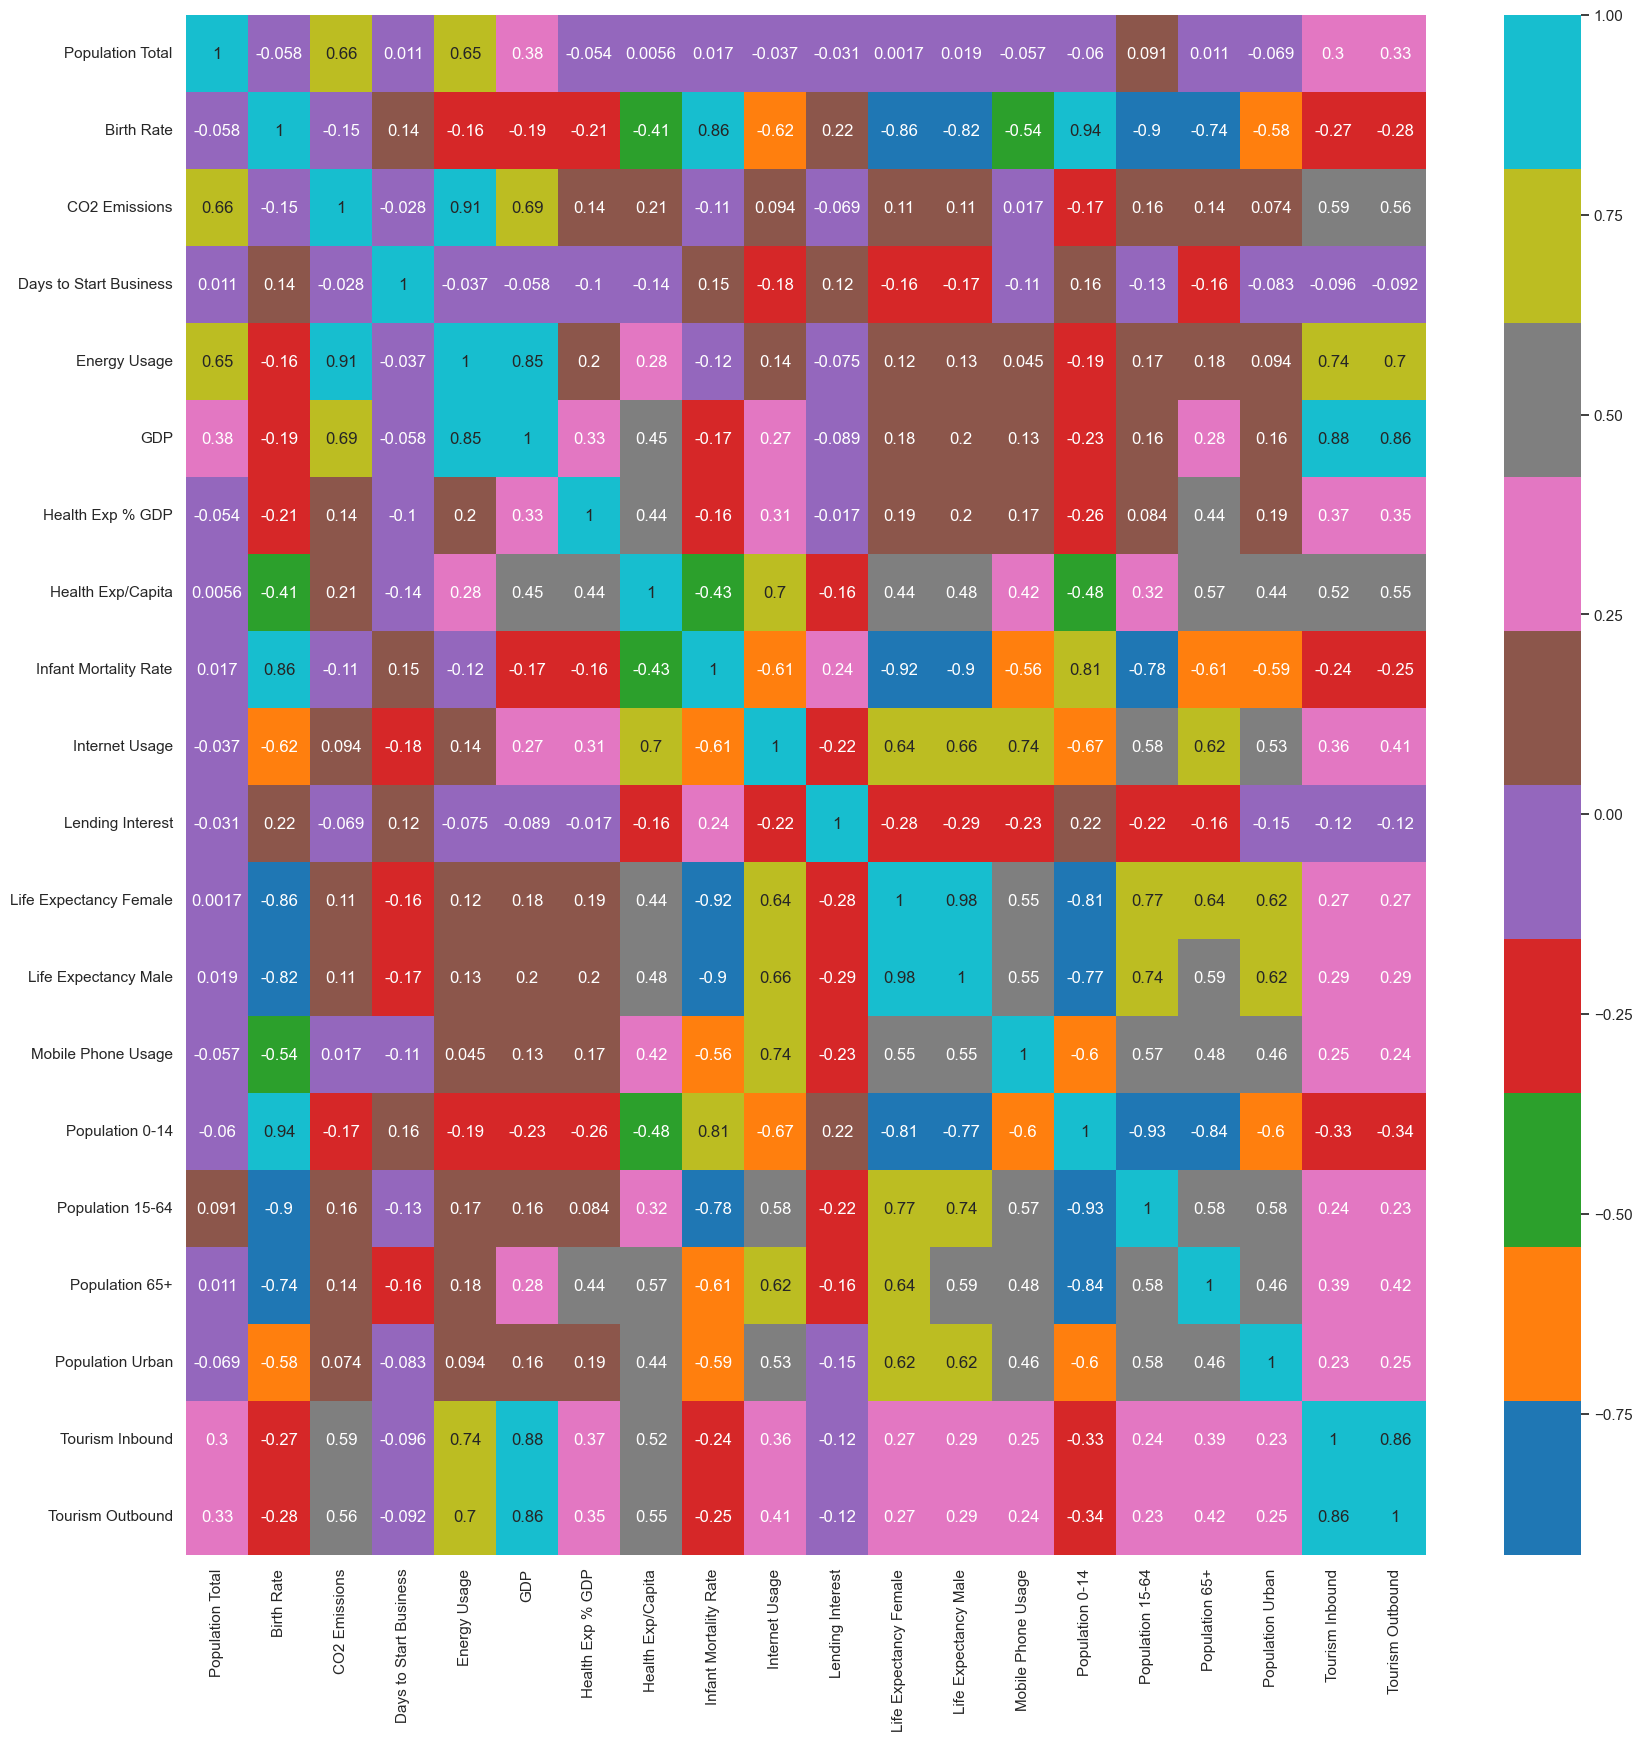

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(visual.corr(),annot=True,cmap='tab10')
plt.show()

<b>From Correlation Matrix:<br>
    
    1.Correlation between Birth rate and Infant Mortality rate, Birth rate and Popolation 0 to 14 is high.
    2.Correlation between Energy Usage and Co2 Emmision is also high, Energy usage and GDP are also correlated.
    3.GDP is also corelated with Touriam Inbound and Outbound.
    4.Tourism inbound and outbound are correlated vice versa.
    
<b>Since GDP is a important factor we can not drop it. Birth rate can be droped as it is correlated with two columns, simillarly Energy usage can be droped or we can also drop Population 0 to 14,Infant mortality rate and Co2 emmision.we can keep either one of Toursim inbound or outbound column<br>
    
<b>Let us aslo drop country from our data set as its importance is very low compared to other metrics.

In [24]:
data_5 = data_4.drop(['Country','Population 0-14','CO2 Emissions','Infant Mortality Rate','Tourism Outbound'],axis=1)
data_5

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
1             13924930    0.050000                    26.0        7499.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2699             32427    0.022715                    26.0       14338.0   
2700         313873685    0.013000                     5.0     2132446.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
1     9.129595e+09           0.03400               22.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
...            ...               ...                ...             ...   
2699  1.507975e+10           0.06417              193.0             0.1   
2700  1.624460e+13           0.17900             8895.0             0.8   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
1                    0.0          0.499000           0.025             0.324   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
...                  ...               ...             ...               ...   
2699                 0.5          0.623481           0.052             0.911   
2700                 1.0          0.667000           0.136             0.811   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  
0        1.020000e+08  
1        3.400000e+07  
2        7.700000e+07  
3        2.270000e+08  
4        2.300000e+07  
...               ...  
2699     6.885000e+08  
2700     2.000920e+11  
2701     2.222000e+09  
2702     9.040000e+08  
2703     6.885000e+08  

[2704 rows x 16 columns]

<b><h1>DATA PREPROCESSING

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_5)

data_scaled

array([[ 2.10962170e-03, -2.44938515e-01, -1.92652090e-01, ...,
        -6.83980858e-01,  1.47332941e-01, -3.28776095e-01],
       [-1.41086916e-01,  2.46167047e+00, -1.92652090e-01, ...,
        -9.76653847e-01, -9.76646386e-01, -3.34025635e-01],
       [-1.97220865e-01,  1.83012837e+00, -1.92652090e-01, ...,
        -8.93032993e-01, -7.35501730e-01, -3.30706073e-01],
       ...,
       [-2.25821620e-01, -6.96040012e-01, -6.04181497e-01, ...,
         1.42744571e+00,  1.57376489e+00, -1.65113960e-01],
       [-1.20910546e-02, -2.44938515e-01,  2.36316212e+00, ...,
        -2.44971374e-01,  1.33262023e+00, -2.66862401e-01],
       [-2.52296820e-01, -1.05692121e+00, -1.92652090e-01, ...,
         1.67830827e+00,  1.57785208e+00, -2.83498811e-01]])

In [26]:
data_scaled.shape

(2704, 16)

<b><h1>MODEL BUILDING

<b><h2>1.HEIRARCHICAL CLUSTERING

<b><h3>DENDROGRAM

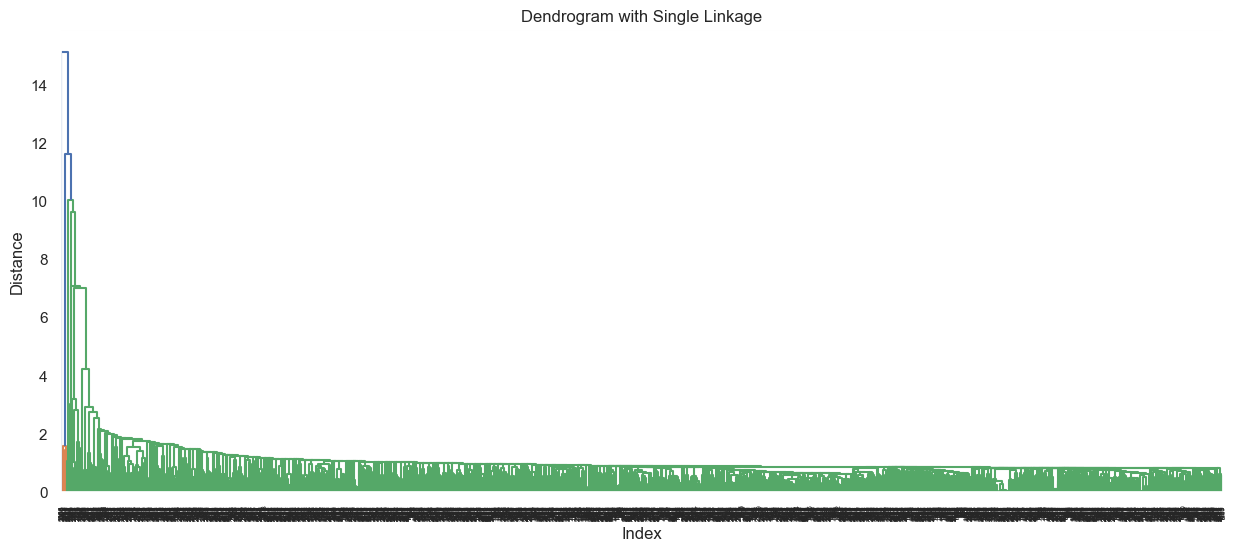

In [27]:
#linkage ------- single.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='single',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with Single Linkage')
plt.show()

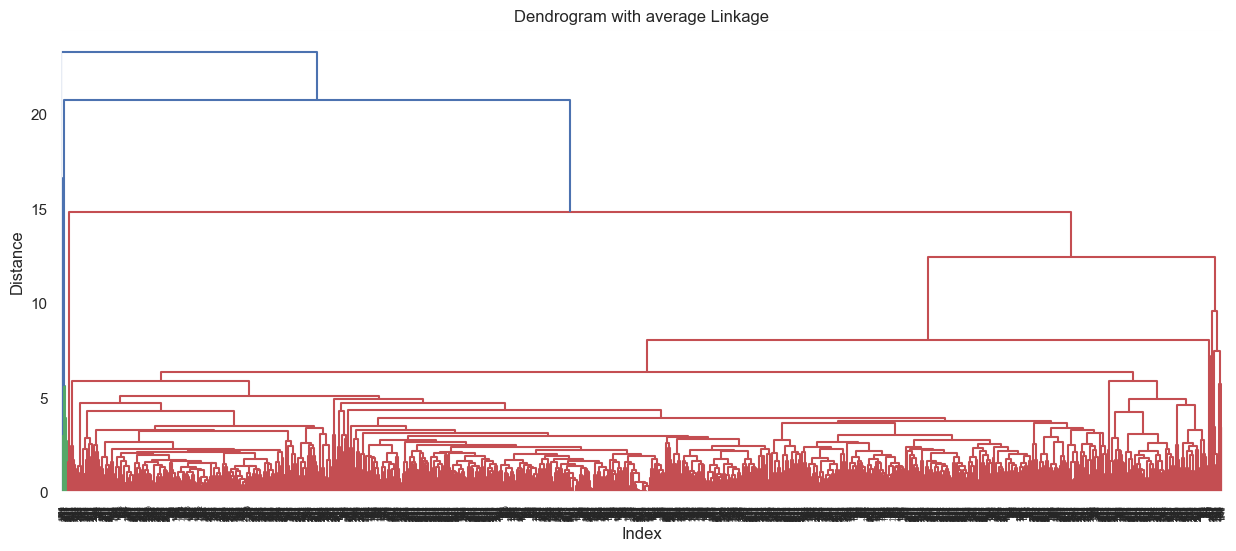

In [28]:
#linkage ------- average.
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='average',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with average Linkage')
plt.show()

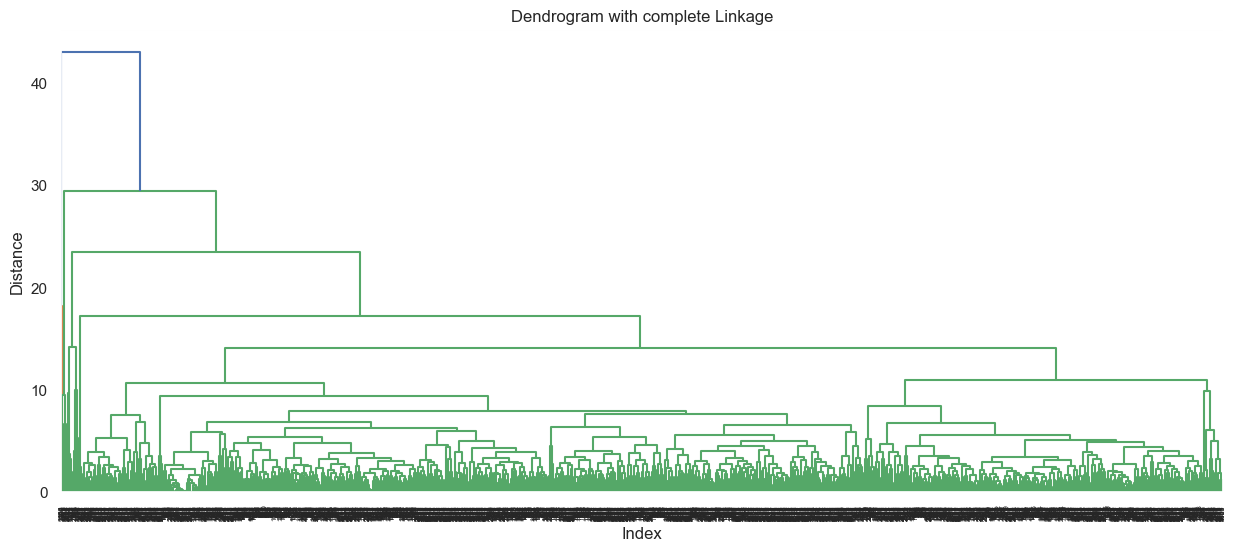

In [29]:
#linkage ------- complete.
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='complete',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with complete Linkage')
plt.show()

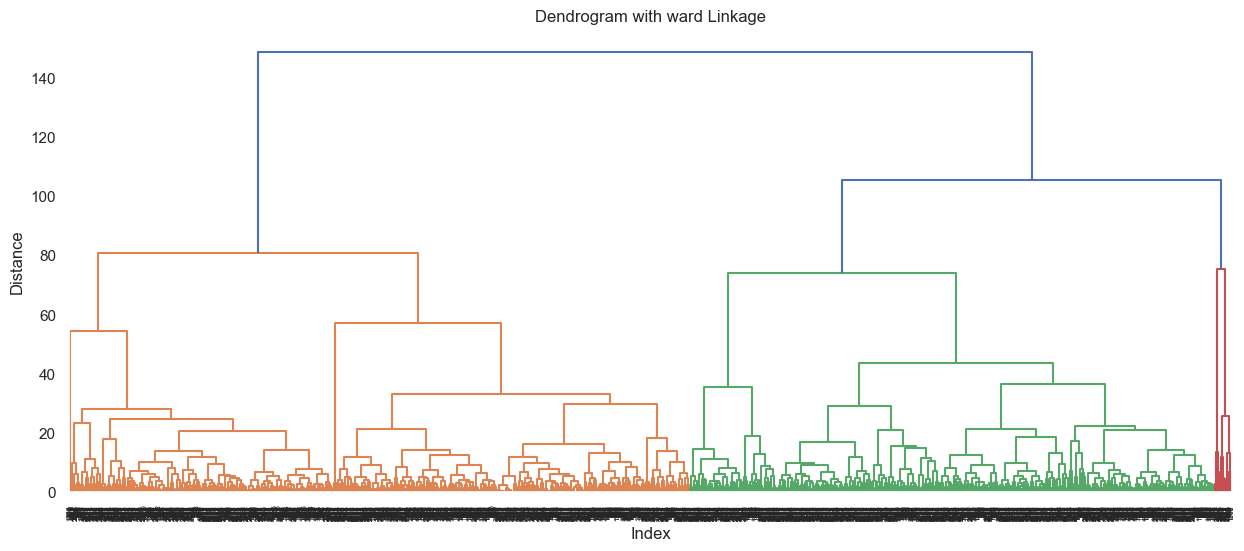

In [30]:
#linkage ------- ward.
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='ward',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with ward Linkage')
plt.show()

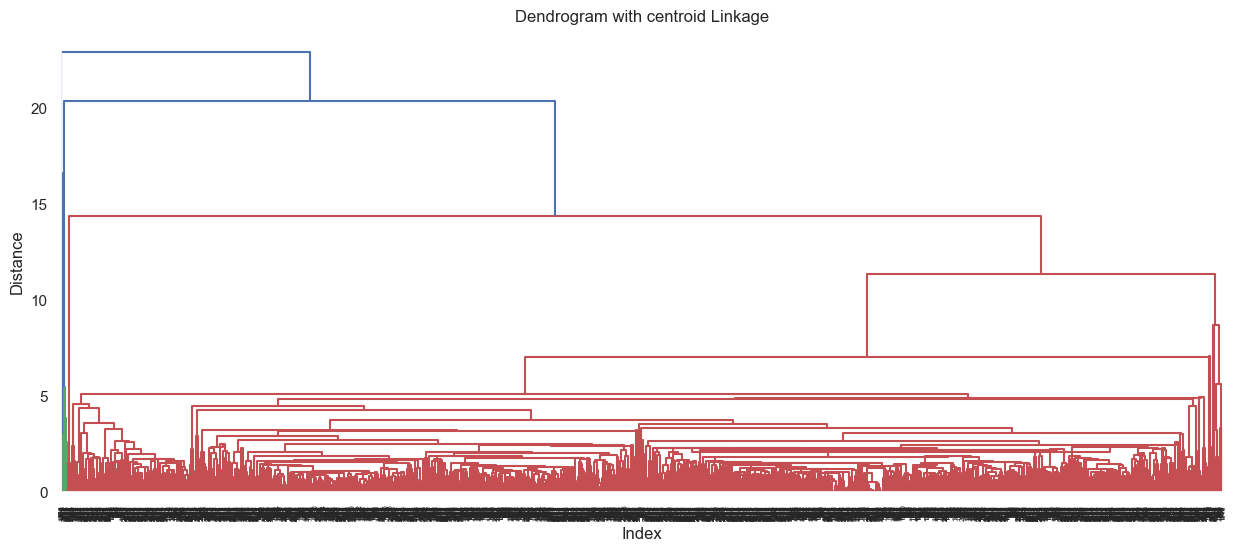

In [31]:
#linkage ------- centroid.
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='centroid',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with centroid Linkage')
plt.show()

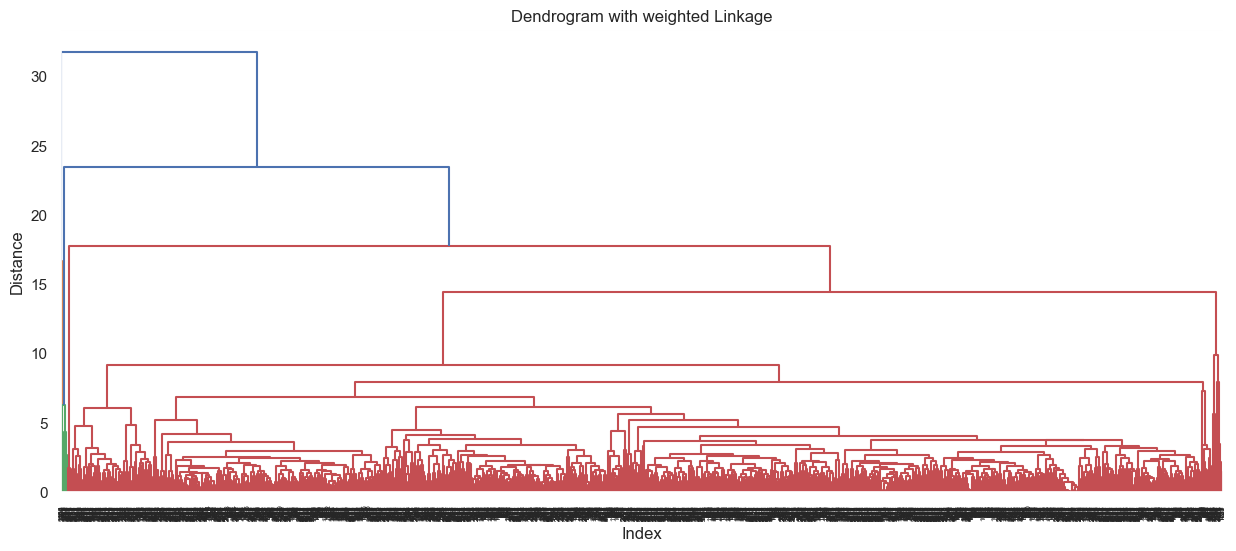

In [33]:
#linkage ------- weighted.
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='weighted',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with weighted Linkage')
plt.show()

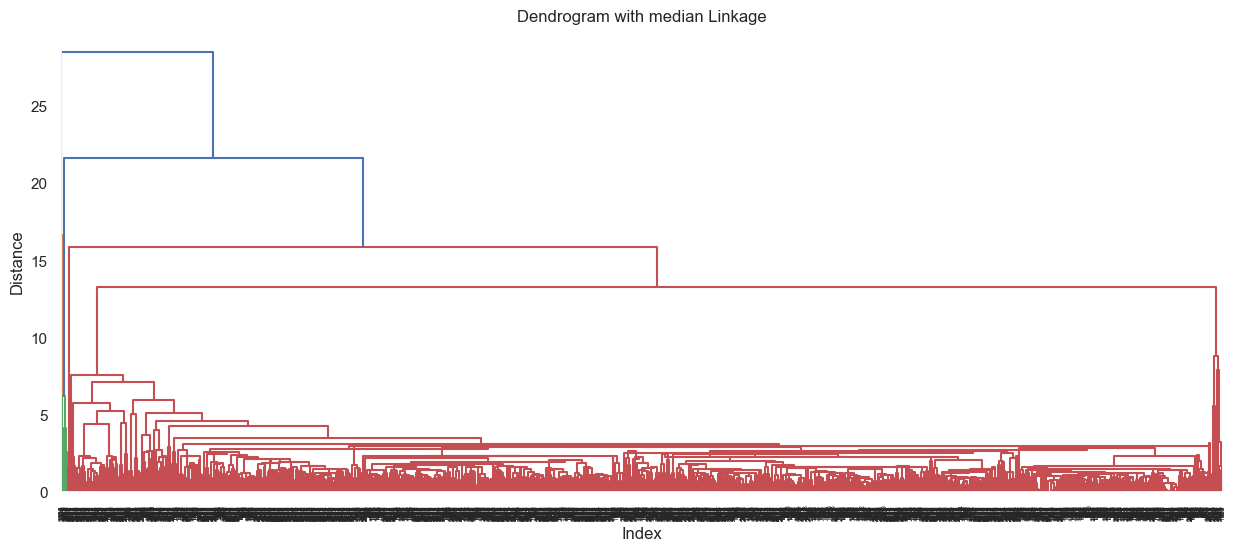

In [34]:
#linkage ------- median.
plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(data_scaled,method='median',metric='euclidean'))
plt.ylabel('Distance')
plt.xlabel('Index')
plt.title('Dendrogram with median Linkage')
plt.show()

<b>Let us choose ward as linkage as it has best results comparitively

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score

for nc in range(2,10):
    cluster_h = AgglomerativeClustering(n_clusters=nc,linkage='ward',metric='euclidean').fit(data_scaled)
    cluster_labels = pd.Series(cluster_h.labels_)
    sil_score = silhouette_score(data_scaled,cluster_labels)
    dbs = davies_bouldin_score(data_scaled,cluster_labels)
    print('Number of Clusters:',nc,'|| Silhouette Score:',sil_score,'|| Davies_Bouldin_Score:',dbs)

Number of Clusters: 2 || Silhouette Score: 0.2768459157654063 || Davies_Bouldin_Score: 1.3948750166005872
Number of Clusters: 3 || Silhouette Score: 0.28728433540796955 || Davies_Bouldin_Score: 1.18977182775438
Number of Clusters: 4 || Silhouette Score: 0.19876280353379325 || Davies_Bouldin_Score: 1.3479940746179728
Number of Clusters: 5 || Silhouette Score: 0.2048270391191355 || Davies_Bouldin_Score: 1.0794487649858255
Number of Clusters: 6 || Silhouette Score: 0.20965576223458057 || Davies_Bouldin_Score: 1.1345546722445672
Number of Clusters: 7 || Silhouette Score: 0.21041257984356956 || Davies_Bouldin_Score: 0.9904233733772073
Number of Clusters: 8 || Silhouette Score: 0.21357257623992348 || Davies_Bouldin_Score: 0.9237993768524778
Number of Clusters: 9 || Silhouette Score: 0.20302131800845238 || Davies_Bouldin_Score: 1.1262931784836083


<b>Let choose Number of clusters = 5 as they have good silhouette score and a lower Davies Bouldin score

In [36]:
cluster_agglomerative = AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean').fit(data_scaled)
agglomerative_clusters = pd.Series(cluster_agglomerative.labels_)
print(agglomerative_clusters)

0       1
1       3
2       3
3       3
4       3
       ..
2699    1
2700    4
2701    0
2702    0
2703    0
Length: 2704, dtype: int64


In [37]:
data_h_clusters = data_5.copy()
data_h_clusters['h_clusters'] = agglomerative_clusters
data_h_clusters['country'] = data['Country']
data_h_clusters

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
1             13924930    0.050000                    26.0        7499.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2699             32427    0.022715                    26.0       14338.0   
2700         313873685    0.013000                     5.0     2132446.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
1     9.129595e+09           0.03400               22.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
...            ...               ...                ...             ...   
2699  1.507975e+10           0.06417              193.0             0.1   
2700  1.624460e+13           0.17900             8895.0             0.8   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
1                    0.0          0.499000           0.025             0.324   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
...                  ...               ...             ...               ...   
2699                 0.5          0.623481           0.052             0.911   
2700                 1.0          0.667000           0.136             0.811   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  h_clusters                   country  
0        1.020000e+08           1                   Algeria  
1        3.400000e+07           3                    Angola  
2        7.700000e+07           3                     Benin  
3        2.270000e+08           3                  Botswana  
4        2.300000e+07           3              Burkina F

In [38]:
data_h_clusters[data_h_clusters['h_clusters']==0]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
54             3076098       0.013                    26.0        2015.0   
58              331801       0.023                    26.0        2385.0   
61             4418300       0.012                    26.0        2869.0   
62             6665000       0.008                    26.0       13392.0   
65           126870000       0.009                    26.0      518964.0   
...                ...         ...                     ...           ...   
2696            109373       0.017                    10.0       14338.0   
2698           1337439       0.015                    41.0       14338.0   
2701           3395253       0.015                     7.0       14338.0   
2702          29954782       0.020                   144.0       14338.0   
2703            105275       0.011                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
54    1.911564e+09           0.06300               39.0             0.0   
58    6.001153e+09           0.03000              543.0             0.1   
61    3.057453e+09           0.06900               45.0             0.0   
62    1.716682e+11           0.06417              193.0             0.3   
65    4.731199e+12           0.07600             2834.0             0.3   
...            ...               ...                ...             ...   
2696  6.944444e+08           0.05200              340.0             0.5   
2698  2.343634e+10           0.05400              972.0             0.6   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
54               0.316                    75.0                  68.0   
58               0.055                    78.0                  74.0   
61               0.247                    75.0                  68.0   
62               0.095                    84.0                  78.0   
65               0.021                    85.0                  78.0   
...                ...                     ...                   ...   
2696             0.094                    75.0                  70.0   
2698             0.077                    74.0                  66.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
54                   0.0             0.641           0.100             0.647   
58                   0.3             0.668           0.028             0.712   
61                   0.0             0.656           0.125             0.526   
62                   0.8             0.717           0.110             1.000   
65                   0.5             0.682           0.172             0.786   
...                  ...               ...             ...               ...   
2696                 1.2             0.675           0.068             0.495   
2698                 1.4             0.705           0.088             0.088   
2701                 1.5             0.639           0.140             0.948   
2702                 1.0             0.652           0.060             0.889   
2703                 0.5             0.641           0.152             0.949   

      Tourism Inbound  h_clusters                         country  
54       5.200000e+07           0                         Armenia  
58       6.885000e+08           0               Brunei Darussalam  
61       1.070000e+08           0                         Georgia  
62       8.198000e+09           0            Hong Kong SAR, China  
65       5.970000e+09     

In [39]:
data_h_clusters[data_h_clusters['h_clusters']==1]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
14            66136590    0.025000                    26.0       40658.0   
18             1225527    0.034000                    26.0        1463.0   
26             5176185    0.022000                    26.0       15901.0   
31             1186873    0.017000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2689           6687361    0.024000                    35.0       14338.0   
2692             39088    0.022715                    26.0       14338.0   
2695             30959    0.016000                    26.0       14338.0   
2697            534541    0.018000                   694.0       14338.0   
2699             32427    0.022715                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
14    9.983854e+10           0.05400               79.0             0.0   
18    5.067866e+09           0.02900              118.0             0.0   
26    3.389660e+10           0.03400              252.0             0.0   
31    4.582562e+09           0.03700              146.0             0.1   
...            ...               ...                ...             ...   
2689  2.461104e+10           0.10300              392.0             0.3   
2692  1.507975e+10           0.06417              193.0             0.1   
2695  1.507975e+10           0.06417              193.0             0.1   
2697  5.012121e+09           0.05900              521.0             0.3   
2699  1.507975e+10           0.06417              193.0             0.1   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
14               0.132                    71.0                  66.0   
18               0.220                    61.0                  59.0   
26               0.070                    74.0                  70.0   
31               0.208                    75.0                  68.0   
...                ...                     ...                   ...   
2689             0.172                    74.0                  70.0   
2692             0.120                    75.0                  69.0   
2695             0.120                    82.0                  76.0   
2697             0.117                    74.0                  68.0   
2699             0.120                    75.0                  69.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039          0.599000   
14                   0.0          0.592000           0.053          0.428000   
18                   0.1          0.535000           0.059          0.801000   
26                   0.0          0.628000           0.039          0.763000   
31                   0.2          0.681000           0.061          0.427000   
...                  ...               ...             ...               ...   
2689                 1.0          0.619000           0.054          0.589000   
2692                 0.5          0.623481           0.052          1.000000   
2695                 0.5          0.623481           0.052          0.562953   
2697                 1.1          0.656000           0.066          0.662000   
2699                 0.5          0.623481           0.052          0.911000   

      Tourism Inbound  h_clusters                    country  
0        1.020000e+08           1                    Algeria  
14       4.657000e+09           1           Egypt, Arab Rep.  
18       9.900000e+07           1                      Gabon  
26       8.400000e+07           1                      Libya  
31       7.320000e+08           1                  

In [40]:
data_h_clusters[data_h_clusters['h_clusters']==2]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
60          1262645000       0.014                    26.0     1161353.0   
63          1042261758       0.026                    26.0      457198.0   
268         1271850000       0.013                    26.0     1186797.0   
271         1059500888       0.025                    26.0      464501.0   
476         1280400000       0.013                    26.0     1253831.0   
479         1076705723       0.025                    26.0      477540.0   
684         1288400000       0.012                    48.0     1427554.0   
687         1093786762       0.024                    89.0      489507.0   
892         1296075000       0.012                    48.0     1639854.0   
895         1110626108       0.024                    89.0      519165.0   
1100        1303720000       0.012                    48.0     1775677.0   
1103        1127143548       0.023                    71.0      539388.0   
1308        1311020000       0.012                    35.0     1938944.0   
1311        1143289350       0.023                    35.0      567182.0   
1516        1317885000       0.012                    35.0     2044606.0   
1519        1159095250       0.022                    33.0      604659.0   
1724        1324655000       0.012                    41.0     2120814.0   
1727        1174662334       0.022                    30.0      632956.0   
1932        1331260000       0.012                    38.0     2286137.0   
1935        1190138069       0.022                    30.0      698360.0   
2140        1337705000       0.012                    38.0     2516731.0   
2143        1205624648       0.021                    29.0      723743.0   
2348        1344130000       0.012                    38.0     2727728.0   
2351        1221156319       0.021                    29.0      749447.0   
2556        1350695000       0.012                    33.0       14338.0   
2559        1236686732       0.021                    27.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
60    1.198475e+12             0.046               43.0             0.0   
63    4.766091e+11             0.043               20.0             0.0   
268   1.324807e+12             0.046               47.0             0.0   
271   4.939543e+11             0.045               21.0             0.0   
476   1.453828e+12             0.048               54.0             0.0   
479   5.239686e+11             0.044               21.0             0.0   
684   1.640959e+12             0.048               61.0             0.1   
687   6.183565e+11             0.043               24.0             0.0   
892   1.931644e+12             0.047               70.0             0.1   
895   7.215856e+11             0.045               29.0             0.0   
1100  2.256903e+12             0.047               80.0             0.1   
1103  8.342150e+11             0.042               32.0             0.0   
1308  2.712951e+12             0.046               93.0             0.1   
1311  9.491168e+11             0.040               33.0             0.0   
1516  3.494056e+12             0.044              113.0             0.2   
1519  1.238700e+12             0.039               40.0             0.0   
1724  4.521827e+12             0.046              155.0             0.2   
1727  1.224097e+12             0.039               43.0             0.0   
1932  4.990234e+12             0.051              189.0             0.3   
1935  1.365372e+12             0.039               44.0             0.1   
2140  5.930502e+12             0.050              216.0             0.3   
2143  1.708459e+12             0.037               52.0             0.1   
2348  7.321892e+12             0.051              274.0             0.4   
2351  1.880100e+12             0.039               62.0             0.1   
2556  8.229490e+12             0.054              322.0             0.4   
255

In [41]:
data_h_clusters[data_h_clusters['h_clusters']==3]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
1             13924930       0.050                    26.0        7499.0   
2              6949366       0.043                    26.0        1983.0   
3              1755375       0.027                    26.0        1836.0   
4             11607944       0.046                    26.0       14338.0   
5              6674286       0.042                    26.0       14338.0   
...                ...         ...                     ...           ...   
2546          36345860       0.044                    33.0       14338.0   
2547          14075099       0.043                    17.0       14338.0   
2549          29824536       0.035                     7.0       14338.0   
2579           1148958       0.036                    94.0       14338.0   
2643          23852409       0.031                    40.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
1     9.129595e+09             0.034               22.0             0.0   
2     2.359122e+09             0.043               15.0             0.0   
3     5.788312e+09             0.047              152.0             0.0   
4     2.610959e+09             0.051               12.0             0.0   
5     8.704861e+08             0.063                7.0             0.0   
...            ...               ...                ...             ...   
2546  2.003224e+10             0.080               44.0             0.1   
2547  2.059642e+10             0.065               96.0             0.1   
2549  2.050680e+10             0.086               51.0             0.1   
2579  1.355000e+09             0.043               50.0             0.0   
2643  3.199280e+10             0.055               71.0             0.2   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
5                0.158                    49.0                  47.0   
...                ...                     ...                   ...   
2546             0.263                    60.0                  58.0   
2547             0.121                    59.0                  55.0   
2549             0.150                    62.0                  59.0   
2579             0.122                    69.0                  66.0   
2643             0.245                    64.0                  62.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
1                    0.0             0.499           0.025             0.324   
2                    0.0             0.517           0.029             0.383   
3                    0.1             0.587           0.029             0.532   
4                    0.0             0.505           0.028             0.178   
5                    0.0             0.481           0.029             0.082   
...                  ...               ...             ...               ...   
2546                 0.5             0.490           0.024             0.151   
2547                 0.7             0.506           0.026             0.396   
2549                 0.7             0.503           0.023             0.255   
2579                 0.6             0.505           0.032             0.308   
2643                 0.6             0.565           0.028             0.329   

      Tourism Inbound  h_clusters       country  
1        3.400000e+07           3        Angola  
2        7.700000e+07           3         Benin  
3        2.270000e+08           3      Botswana  
4        2.300000e+07           3  Burkina Faso  
5        1.400000e+06           3       Burundi  
...               ...         ...           ...  
2546     1.10500

In [42]:
data_h_clusters[data_h_clusters['h_clusters']==4]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
204          282162411       0.014                    26.0     2273332.0   
412          284968955       0.014                    26.0     2230817.0   
620          287625193       0.014                    26.0     2255957.0   
828          290107933       0.014                     6.0     2261151.0   
1036         292805298       0.014                     6.0     2307819.0   
1244         295516599       0.014                     6.0     2318861.0   
1452         298379912       0.014                     6.0     2296686.0   
1660         301231207       0.014                     6.0     2337014.0   
1868         304093966       0.014                     5.0     2277034.0   
2076         306771529       0.014                     5.0     2164458.0   
2284         309326295       0.013                     5.0     2215504.0   
2492         311582564       0.013                     5.0     2191193.0   
2700         313873685       0.013                     5.0     2132446.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
204   1.028970e+13             0.136             4790.0             0.4   
412   1.062530e+13             0.142             5138.0             0.5   
620   1.098020e+13             0.151             5578.0             0.6   
828   1.151220e+13             0.156             5993.0             0.6   
1036  1.227700e+13             0.157             6355.0             0.6   
1244  1.309540e+13             0.158             6732.0             0.7   
1452  1.385790e+13             0.159             7110.0             0.7   
1660  1.448030e+13             0.161             7486.0             0.8   
1868  1.472030e+13             0.165             7769.0             0.7   
2076  1.441790e+13             0.177             8009.0             0.7   
2284  1.495830e+13             0.177             8254.0             0.7   
2492  1.553380e+13             0.177             8467.0             0.7   
2700  1.624460e+13             0.179             8895.0             0.8   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
204              0.092                    79.0                  74.0   
412              0.069                    79.0                  74.0   
620              0.047                    80.0                  74.0   
828              0.041                    80.0                  75.0   
1036             0.043                    80.0                  75.0   
1244             0.062                    80.0                  75.0   
1452             0.080                    80.0                  75.0   
1660             0.081                    80.0                  75.0   
1868             0.051                    81.0                  76.0   
2076             0.033                    81.0                  76.0   
2284             0.033                    81.0                  76.0   
2492             0.033                    81.0                  76.0   
2700             0.033                    81.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
204                  0.4             0.663           0.124             0.791   
412                  0.4             0.665           0.123             0.792   
620                  0.5             0.667           0.123             0.794   
828                  0.5             0.669           0.123             0.796   
1036                 0.6             0.670           0.123             0.798   
1244                 0.7             0.671           0.123             0.799   
1452                 0.8             0.672           0.124             0.801   
1660                 0.8             0.673           0.125             0.803   
1868                 0.9             0.673           0.127             0.804   
2076                 0.9             0.672           0.128             0.806   
2

In [43]:
data_h_clusters['h_clusters'].value_counts()

0    1221
1     830
3     614
2      26
4      13
Name: h_clusters, dtype: int64

In [44]:
data_h_clusters.drop(['country'],axis=1,inplace=True)
data_h_clusters.groupby('h_clusters').mean()

Population Total  Birth Rate  Days to Start Business  \
h_clusters                                                         
0               1.664023e+07    0.014004               25.151515   
1               2.198764e+07    0.023797               41.731325   
2               1.225428e+09    0.017654               39.230769   
3               1.751384e+07    0.038979               45.366450   
4               2.983420e+08    0.013769               10.230769   

            Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
h_clusters                                                                    
0           5.201979e+04  3.055386e+11          0.069789        1388.561016   
1           2.392785e+04  5.204717e+10          0.058276         178.410843   
2           1.116629e+06  2.342340e+12          0.044577          84.576923   
3           1.526626e+04  1.801815e+10          0.059737          69.534202   
4           2.250944e+06  1.330715e+13          0.161154        6967.384615   

            Internet Usage  Lending Interest  Life Expectancy Female  \
h_clusters                                                             
0                 0.429484          0.113543               78.952498   
1                 0.085542          0.139161               72.225301   
2                 0.100000          0.086346               70.615385   
3                 0.028664          0.195814               54.902280   
4                 0.653846          0.053692               80.230769   

            Life Expectancy Male  Mobile Phone Usage  Population 15-64  \
h_clusters                                                               
0                      73.033579            0.899427          0.675040   
1                      67.160241            0.352771          0.611514   
2                      67.807692            0.315385          0.674885   
3                      52.770358            0.230782          0.533980   
4                      75.153846            0.715385          0.669385   

            Population 65+  Population Urban  Tourism Inbound  
h_clusters                                                     
0                 0.107564          0.716080     6.524355e+09  
1                 0.048901          0.499246     1.348220e+09  
2                 0.062885          0.367154     2.241712e+10  
3                 0.030495          0.347814     4.773695e+08  
4                 0.126385          0.800923     1.408008e+11

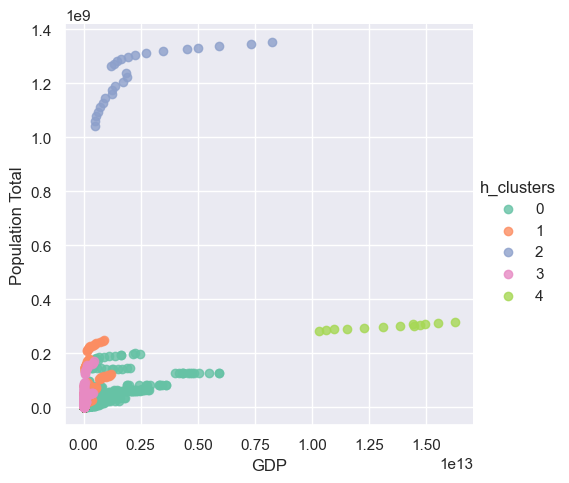

In [45]:
sns.lmplot(data=data_h_clusters,x='GDP',y='Population Total',hue='h_clusters',fit_reg=False,palette = 'Set2')

<b><h2>K-MEANS CLUSTERING

In [46]:
from sklearn.cluster import KMeans
WCSS=[]  #------------>Within Cluster Sum of Squares-------->also called as inertia
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(data_scaled)
    WCSS.append(kmeans.inertia_)
WCSS

[43263.99999999999,
 31411.53309377953,
 25669.538304696656,
 21587.153191693807,
 18928.250824304363,
 16925.13008556971,
 15286.054176634461,
 14446.799560339234,
 12969.82520242273]

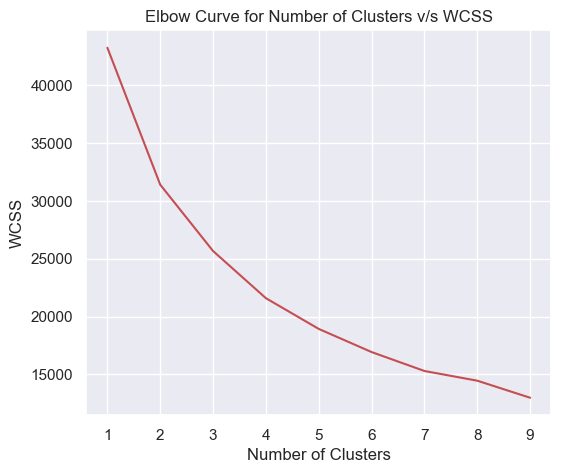

In [47]:
plt.figure(figsize=(6,5))
plt.plot(range(1,10),WCSS,color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve for Number of Clusters v/s WCSS')
plt.show()

<b>Elbow curve starts to flatten at number of clusters = 5 , lrt us also check for Silhouette score and davies Bouldin score

In [48]:
for i in range(2,10):
    km = KMeans(n_clusters=i,n_init=10,random_state=1).fit(data_scaled)
    km_lab = pd.Series(km.labels_)
    sil_score_km = silhouette_score(data_scaled,km_lab)
    dbs_km = davies_bouldin_score(data_scaled,cluster_labels)
    print('Number of Clusters:',i,'|| Silhouette Score:',sil_score_km,'|| Davies_Bouldin_Score:',dbs_km)

Number of Clusters: 2 || Silhouette Score: 0.294930254488573 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 3 || Silhouette Score: 0.31342926771212576 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 4 || Silhouette Score: 0.2719163103738959 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 5 || Silhouette Score: 0.28391619536191126 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 6 || Silhouette Score: 0.2396391105882611 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 7 || Silhouette Score: 0.24481990029929482 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 8 || Silhouette Score: 0.23338740238584382 || Davies_Bouldin_Score: 1.1262931784836083
Number of Clusters: 9 || Silhouette Score: 0.23494444734939746 || Davies_Bouldin_Score: 1.1262931784836083


<b>Lets us take number of cluster =5 as it has the best silhouette score and also DBS score

In [49]:
km_final = KMeans(n_clusters=5,n_init=10,random_state=2).fit(data_scaled)
km_final_labels = pd.Series(km_final.labels_)
data_km_cluster = data_5.copy()
data_km_cluster['km_cluster'] = km_final_labels
data_km_cluster

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
1             13924930    0.050000                    26.0        7499.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2699             32427    0.022715                    26.0       14338.0   
2700         313873685    0.013000                     5.0     2132446.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
1     9.129595e+09           0.03400               22.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
...            ...               ...                ...             ...   
2699  1.507975e+10           0.06417              193.0             0.1   
2700  1.624460e+13           0.17900             8895.0             0.8   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
1                    0.0          0.499000           0.025             0.324   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
...                  ...               ...             ...               ...   
2699                 0.5          0.623481           0.052             0.911   
2700                 1.0          0.667000           0.136             0.811   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  km_cluster  
0        1.020000e+08           4  
1        3.400000e+07           0  
2        7.700000e+07           0  
3        2.270000e+08           0  
4        2.300000e+07           0  
...               ...         ...  
2699     6.885000e+08           4  
2700     2.000920e+11           3  
2701     2.222000e+09           1  
2702  

In [50]:
data_km_cluster['km_cluster'].value_counts()

4    1338
0     799
1     528
2      26
3      13
Name: km_cluster, dtype: int64

In [51]:
data_km_cluster['country'] = data['Country']

In [52]:
data_km_cluster[data_km_cluster['km_cluster']==0]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
1             13924930       0.050                    26.0        7499.0   
2              6949366       0.043                    26.0        1983.0   
3              1755375       0.027                    26.0        1836.0   
4             11607944       0.046                    26.0       14338.0   
5              6674286       0.042                    26.0       14338.0   
...                ...         ...                     ...           ...   
2577           8008990       0.033                    24.0       14338.0   
2579           1148958       0.036                    94.0       14338.0   
2643          23852409       0.031                    40.0       14338.0   
2654           7167010       0.029                    53.0       14338.0   
2656            549598       0.031                     9.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
1     9.129595e+09             0.034               22.0             0.0   
2     2.359122e+09             0.043               15.0             0.0   
3     5.788312e+09             0.047              152.0             0.0   
4     2.610959e+09             0.051               12.0             0.0   
5     8.704861e+08             0.063                7.0             0.0   
...            ...               ...                ...             ...   
2577  7.633050e+09             0.058               55.0             0.1   
2579  1.355000e+09             0.043               50.0             0.0   
2643  3.199280e+10             0.055               71.0             0.2   
2654  1.565392e+10             0.052              114.0             0.0   
2656  9.999724e+08             0.080              148.0             0.1   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
5                0.158                    49.0                  47.0   
...                ...                     ...                   ...   
2577             0.252                    71.0                  64.0   
2579             0.122                    69.0                  66.0   
2643             0.245                    64.0                  62.0   
2654             0.108                    64.0                  60.0   
2656             0.113                    69.0                  66.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
1                    0.0             0.499           0.025             0.324   
2                    0.0             0.517           0.029             0.383   
3                    0.1             0.587           0.029             0.532   
4                    0.0             0.505           0.028             0.178   
5                    0.0             0.481           0.029             0.082   
...                  ...               ...             ...               ...   
2577                 0.8             0.610           0.032             0.266   
2579                 0.6             0.505           0.032             0.308   
2643                 0.6             0.565           0.028             0.329   
2654                 0.4             0.588           0.029             0.130   
2656                 0.6             0.563           0.033             0.210   

      Tourism Inbound  km_cluster           country  
1        3.400000e+07           0            Angola  
2        7.700000e+07           0             Benin  
3        2.270000e+08           0          Botswana  
4        2.300000e+07           0      Burkina Faso  
5        1.400000e+06           0           Burundi  
...               ...         ...         

In [53]:
data_km_cluster[data_km_cluster['km_cluster']==1]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
62             6665000       0.008                    26.0       13392.0   
65           126870000       0.009                    26.0      518964.0   
89             8011566       0.010                    26.0       28558.0   
91            10251250       0.011                    26.0       58508.0   
97             5339616       0.013                    26.0       18634.0   
...                ...         ...                     ...           ...   
2669             57570       0.013                    26.0       14338.0   
2670          17464814       0.014                     8.0       32720.0   
2672           4805295       0.015                    60.0       14338.0   
2691           3651545       0.011                     6.0       14338.0   
2701           3395253       0.015                     7.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
62    1.716682e+11           0.06417              193.0             0.3   
65    4.731199e+12           0.07600             2834.0             0.3   
89    1.920707e+11           0.10000             2403.0             0.3   
91    2.326727e+11           0.08100             1845.0             0.3   
97    1.600825e+11           0.08700             2613.0             0.4   
...            ...               ...                ...             ...   
2669  1.507975e+10           0.06417              193.0             0.7   
2670  2.662593e+11           0.07200             1103.0             0.6   
2672  4.537479e+10           0.10100              951.0             0.5   
2691  1.010807e+11           0.06417              193.0             0.7   
2701  5.000435e+10           0.08900             1308.0             0.5   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
62               0.095                    84.0                  78.0   
65               0.021                    85.0                  78.0   
89               0.120                    81.0                  75.0   
91               0.080                    81.0                  75.0   
97               0.081                    79.0                  74.0   
...                ...                     ...                   ...   
2669             0.120                    75.0                  69.0   
2670             0.101                    82.0                  77.0   
2672             0.182                    82.0                  78.0   
2691             0.120                    82.0                  75.0   
2701             0.112                    80.0                  74.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
62                   0.8          0.717000           0.110             1.000   
65                   0.5          0.682000           0.172             0.786   
89                   0.8          0.675000           0.155             0.658   
91                   0.5          0.655000           0.169             0.971   
97                   0.6          0.667000           0.149             0.851   
...                  ...               ...             ...               ...   
2669                 1.7          0.623481           0.052             1.000   
2670                 1.4          0.689000           0.097             0.890   
2672                 1.1          0.692000           0.068             0.739   
2691                 0.8          0.667000           0.135             0.937   
2701                 1.5          0.639000           0.140             0.948   

      Tourism Inbound  km_cluster               country  
62       8.198000e+09           1  Hong Kong SAR, China  
65       5.970000e+09           1                 Japan  
89       1.138200e+10           1               Austria  
91       6.592000e+09           1               Belgium  
97       3.671000e+09           1               Denmark  
...               

In [54]:
data_km_cluster[data_km_cluster['km_cluster']==2]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
60          1262645000       0.014                    26.0     1161353.0   
63          1042261758       0.026                    26.0      457198.0   
268         1271850000       0.013                    26.0     1186797.0   
271         1059500888       0.025                    26.0      464501.0   
476         1280400000       0.013                    26.0     1253831.0   
479         1076705723       0.025                    26.0      477540.0   
684         1288400000       0.012                    48.0     1427554.0   
687         1093786762       0.024                    89.0      489507.0   
892         1296075000       0.012                    48.0     1639854.0   
895         1110626108       0.024                    89.0      519165.0   
1100        1303720000       0.012                    48.0     1775677.0   
1103        1127143548       0.023                    71.0      539388.0   
1308        1311020000       0.012                    35.0     1938944.0   
1311        1143289350       0.023                    35.0      567182.0   
1516        1317885000       0.012                    35.0     2044606.0   
1519        1159095250       0.022                    33.0      604659.0   
1724        1324655000       0.012                    41.0     2120814.0   
1727        1174662334       0.022                    30.0      632956.0   
1932        1331260000       0.012                    38.0     2286137.0   
1935        1190138069       0.022                    30.0      698360.0   
2140        1337705000       0.012                    38.0     2516731.0   
2143        1205624648       0.021                    29.0      723743.0   
2348        1344130000       0.012                    38.0     2727728.0   
2351        1221156319       0.021                    29.0      749447.0   
2556        1350695000       0.012                    33.0       14338.0   
2559        1236686732       0.021                    27.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
60    1.198475e+12             0.046               43.0             0.0   
63    4.766091e+11             0.043               20.0             0.0   
268   1.324807e+12             0.046               47.0             0.0   
271   4.939543e+11             0.045               21.0             0.0   
476   1.453828e+12             0.048               54.0             0.0   
479   5.239686e+11             0.044               21.0             0.0   
684   1.640959e+12             0.048               61.0             0.1   
687   6.183565e+11             0.043               24.0             0.0   
892   1.931644e+12             0.047               70.0             0.1   
895   7.215856e+11             0.045               29.0             0.0   
1100  2.256903e+12             0.047               80.0             0.1   
1103  8.342150e+11             0.042               32.0             0.0   
1308  2.712951e+12             0.046               93.0             0.1   
1311  9.491168e+11             0.040               33.0             0.0   
1516  3.494056e+12             0.044              113.0             0.2   
1519  1.238700e+12             0.039               40.0             0.0   
1724  4.521827e+12             0.046              155.0             0.2   
1727  1.224097e+12             0.039               43.0             0.0   
1932  4.990234e+12             0.051              189.0             0.3   
1935  1.365372e+12             0.039               44.0             0.1   
2140  5.930502e+12             0.050              216.0             0.3   
2143  1.708459e+12             0.037               52.0             0.1   
2348  7.321892e+12             0.051              274.0             0.4   
2351  1.880100e+12             0.039               62.0             0.1   
2556  8.229490e+12             0.054              322.0             0.4   
255

In [55]:
data_km_cluster[data_km_cluster['km_cluster']==3]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
204          282162411       0.014                    26.0     2273332.0   
412          284968955       0.014                    26.0     2230817.0   
620          287625193       0.014                    26.0     2255957.0   
828          290107933       0.014                     6.0     2261151.0   
1036         292805298       0.014                     6.0     2307819.0   
1244         295516599       0.014                     6.0     2318861.0   
1452         298379912       0.014                     6.0     2296686.0   
1660         301231207       0.014                     6.0     2337014.0   
1868         304093966       0.014                     5.0     2277034.0   
2076         306771529       0.014                     5.0     2164458.0   
2284         309326295       0.013                     5.0     2215504.0   
2492         311582564       0.013                     5.0     2191193.0   
2700         313873685       0.013                     5.0     2132446.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
204   1.028970e+13             0.136             4790.0             0.4   
412   1.062530e+13             0.142             5138.0             0.5   
620   1.098020e+13             0.151             5578.0             0.6   
828   1.151220e+13             0.156             5993.0             0.6   
1036  1.227700e+13             0.157             6355.0             0.6   
1244  1.309540e+13             0.158             6732.0             0.7   
1452  1.385790e+13             0.159             7110.0             0.7   
1660  1.448030e+13             0.161             7486.0             0.8   
1868  1.472030e+13             0.165             7769.0             0.7   
2076  1.441790e+13             0.177             8009.0             0.7   
2284  1.495830e+13             0.177             8254.0             0.7   
2492  1.553380e+13             0.177             8467.0             0.7   
2700  1.624460e+13             0.179             8895.0             0.8   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
204              0.092                    79.0                  74.0   
412              0.069                    79.0                  74.0   
620              0.047                    80.0                  74.0   
828              0.041                    80.0                  75.0   
1036             0.043                    80.0                  75.0   
1244             0.062                    80.0                  75.0   
1452             0.080                    80.0                  75.0   
1660             0.081                    80.0                  75.0   
1868             0.051                    81.0                  76.0   
2076             0.033                    81.0                  76.0   
2284             0.033                    81.0                  76.0   
2492             0.033                    81.0                  76.0   
2700             0.033                    81.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
204                  0.4             0.663           0.124             0.791   
412                  0.4             0.665           0.123             0.792   
620                  0.5             0.667           0.123             0.794   
828                  0.5             0.669           0.123             0.796   
1036                 0.6             0.670           0.123             0.798   
1244                 0.7             0.671           0.123             0.799   
1452                 0.8             0.672           0.124             0.801   
1660                 0.8             0.673           0.125             0.803   
1868                 0.9             0.673           0.127             0.804   
2076                 0.9             0.672           0.128             0.806   
2

In [56]:
data_km_cluster[data_km_cluster['km_cluster']==4]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
14            66136590    0.025000                    26.0       40658.0   
26             5176185    0.022000                    26.0       15901.0   
31             1186873    0.017000                    26.0       14338.0   
32            28710123    0.022000                    26.0       10238.0   
...                ...         ...                     ...           ...   
2697            534541    0.018000                   694.0       14338.0   
2698           1337439    0.015000                    41.0       14338.0   
2699             32427    0.022715                    26.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
14    9.983854e+10           0.05400               79.0             0.0   
26    3.389660e+10           0.03400              252.0             0.0   
31    4.582562e+09           0.03700              146.0             0.1   
32    3.702061e+10           0.04200               54.0             0.0   
...            ...               ...                ...             ...   
2697  5.012121e+09           0.05900              521.0             0.3   
2698  2.343634e+10           0.05400              972.0             0.6   
2699  1.507975e+10           0.06417              193.0             0.1   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
14               0.132                    71.0                  66.0   
26               0.070                    74.0                  70.0   
31               0.208                    75.0                  68.0   
32               0.133                    70.0                  67.0   
...                ...                     ...                   ...   
2697             0.117                    74.0                  68.0   
2698             0.077                    74.0                  66.0   
2699             0.120                    75.0                  69.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
14                   0.0          0.592000           0.053             0.428   
26                   0.0          0.628000           0.039             0.763   
31                   0.2          0.681000           0.061             0.427   
32                   0.1          0.613000           0.047             0.533   
...                  ...               ...             ...               ...   
2697                 1.1          0.656000           0.066             0.662   
2698                 1.4          0.705000           0.088             0.088   
2699                 0.5          0.623481           0.052             0.911   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  km_cluster                   country  
0        1.020000e+08           4                   Algeria  
14       4.657000e+09           4          Egypt, Arab Rep.  
26       8.400000e+07           4                     Libya  
31       7.320000e+08           4                 Mauritius  
32       2.280000e+09           4                   Moro

In [57]:
data_km_cluster.drop(['country'],axis=1,inplace=True)

In [58]:
data_km_cluster.groupby('km_cluster').mean()

Population Total  Birth Rate  Days to Start Business  \
km_cluster                                                         
0               1.736964e+07    0.036989               44.610763   
1               2.024486e+07    0.011668               20.200758   
2               1.225428e+09    0.017654               39.230769   
3               2.983420e+08    0.013769               10.230769   
4               1.850025e+07    0.018736               35.046338   

            Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
km_cluster                                                                    
0           1.427837e+04  1.502046e+10          0.059467          69.434293   
1           7.768961e+04  5.969653e+11          0.082283        2651.829545   
2           1.116629e+06  2.342340e+12          0.044577          84.576923   
3           2.250944e+06  1.330715e+13          0.161154        6967.384615   
4           3.013545e+04  7.483255e+10          0.059268         321.796712   

            Internet Usage  Lending Interest  Life Expectancy Female  \
km_cluster                                                             
0                 0.028411          0.185169               57.723404   
1                 0.605303          0.087288               81.439394   
2                 0.100000          0.086346               70.615385   
3                 0.653846          0.053692               80.230769   
4                 0.202317          0.134777               75.438714   

            Life Expectancy Male  Mobile Phone Usage  Population 15-64  \
km_cluster                                                               
0                      55.196496            0.217397          0.540830   
1                      75.666667            1.078030          0.678707   
2                      67.807692            0.315385          0.674885   
3                      75.153846            0.715385          0.669385   
4                      69.704036            0.590284          0.649600   

            Population 65+  Population Urban  Tourism Inbound  
km_cluster                                                     
0                 0.032269          0.341392     3.789558e+08  
1                 0.139733          0.786307     1.232254e+10  
2                 0.062885          0.367154     2.241712e+10  
3                 0.126385          0.800923     1.408008e+11  
4                 0.068076          0.608613     1.920239e+09

<Figure size 600x400 with 0 Axes>

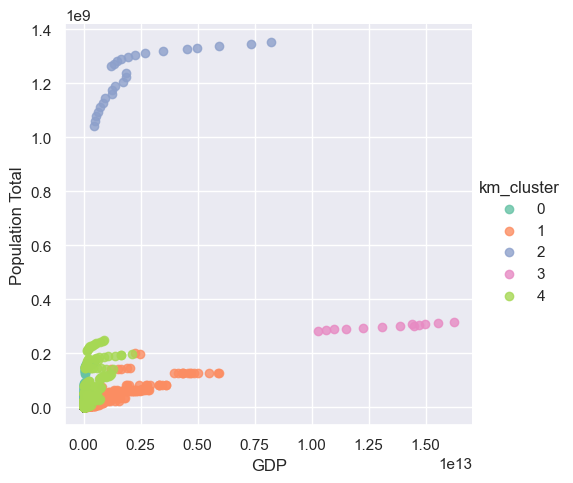

In [59]:
plt.figure(figsize=(6,4))
sns.lmplot(data=data_km_cluster,x='GDP',y='Population Total',hue='km_cluster',fit_reg=False,palette='Set2')
plt.show()

<b><h2>DBSCAN CLUSTERING

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [61]:
#To find the optimum value of epsilon, let us plot Nearest Neighbour distance vs Number of Samples plot
# n_neighbors=2*No of rows/No of Colums-->Convention/Thumb rule
NN=NearestNeighbors(n_neighbors=338).fit(data_scaled)
distance,index=NN.kneighbors(data_scaled)

In [62]:
import plotly.express as px
distances = np.sort(distance,axis=0)
px.line(distances[:,1],height=600)

<b>There is a rapid raise at index=2695 and eps=1.8297.let us try withn this results

In [63]:
# min_samples=(no. of Dimensions/columns)+1//Rule of thumb
dbscan = DBSCAN(eps=1.8297,min_samples=170)
dbscan.fit(data_scaled)

DBSCAN(eps=1.8297, min_samples=170)

In [64]:
dbscan_labels = pd.Series(dbscan.labels_)
dbscan_labels

0       0
1      -1
2       0
3       0
4       0
       ..
2699    0
2700   -1
2701   -1
2702   -1
2703    0
Length: 2704, dtype: int64

<b>We have only one cluster formed and one sample is detected as outlier(or noise). Lets adjust the min_samples parameter and find the best value of it

In [65]:
#Hyperparameter Tuning
for i in range(5,20):
    db= DBSCAN(eps=1.8297,min_samples=i).fit(data_scaled)
    labels = pd.Series(db.labels_)
    sil_score_db = silhouette_score(data_scaled,labels)
    dbs_db = davies_bouldin_score(data_scaled,labels)
    print('Number of Clusters = ',i,'|| Silhouette Score : ',sil_score_db,'|| Davies_Bouldin_Score:',dbs_db)

Number of Clusters =  5 || Silhouette Score :  0.012144995442887304 || Davies_Bouldin_Score: 1.4365153286969854
Number of Clusters =  6 || Silhouette Score :  0.010758385437674997 || Davies_Bouldin_Score: 1.4038905469394234
Number of Clusters =  7 || Silhouette Score :  0.00854408465684074 || Davies_Bouldin_Score: 1.598543654469925
Number of Clusters =  8 || Silhouette Score :  0.09569226258759234 || Davies_Bouldin_Score: 1.713976968235857
Number of Clusters =  9 || Silhouette Score :  0.15943711714252914 || Davies_Bouldin_Score: 1.6801245958962523
Number of Clusters =  10 || Silhouette Score :  0.1574489488842847 || Davies_Bouldin_Score: 1.702742336555448
Number of Clusters =  11 || Silhouette Score :  0.20040812102471275 || Davies_Bouldin_Score: 1.6718347968724743
Number of Clusters =  12 || Silhouette Score :  0.19898762685659982 || Davies_Bouldin_Score: 1.7200254450913668
Number of Clusters =  13 || Silhouette Score :  0.29993481764525715 || Davies_Bouldin_Score: 2.179621707398298


<b>Let's choose min_samples = 11 SInce it as a higher Silhouettte and a lower DBS score

In [66]:
dbscan_final = DBSCAN(eps=1.8297,min_samples=11)
dbscan_final.fit(data_scaled)

DBSCAN(eps=1.8297, min_samples=11)

In [67]:
db_labels = pd.Series(dbscan_final.labels_)
db_labels 

0       0
1      -1
2       0
3       0
4       0
       ..
2699    0
2700   -1
2701    0
2702    0
2703    0
Length: 2704, dtype: int64

In [68]:
db_labels.value_counts()

 0    2535
-1     131
 1      13
 2      13
 3      12
dtype: int64

In [69]:
data_db_cluster = data_5.copy()
data_db_cluster['db_cluster'] = db_labels 
data_db_cluster['country'] = data['Country']
data_db_cluster

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
1             13924930    0.050000                    26.0        7499.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2699             32427    0.022715                    26.0       14338.0   
2700         313873685    0.013000                     5.0     2132446.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
1     9.129595e+09           0.03400               22.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
...            ...               ...                ...             ...   
2699  1.507975e+10           0.06417              193.0             0.1   
2700  1.624460e+13           0.17900             8895.0             0.8   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
1                    0.0          0.499000           0.025             0.324   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
...                  ...               ...             ...               ...   
2699                 0.5          0.623481           0.052             0.911   
2700                 1.0          0.667000           0.136             0.811   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  db_cluster                   country  
0        1.020000e+08           0                   Algeria  
1        3.400000e+07          -1                    Angola  
2        7.700000e+07           0                     Benin  
3        2.270000e+08           0                  Botswana  
4        2.300000e+07           0              Burkina F

In [70]:
data_db_cluster[data_db_cluster['db_cluster']==-1]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
1             13924930       0.050                    26.0        7499.0   
52            12503652       0.032                    26.0        9865.0   
60          1262645000       0.014                    26.0     1161353.0   
65           126870000       0.009                    26.0      518964.0   
124          146596870       0.009                    26.0      619265.0   
...                ...         ...                     ...           ...   
2620         143178000       0.013                    18.0       14338.0   
2625          46761264       0.010                    28.0      124679.0   
2667         198656019       0.015                   119.0       14338.0   
2697            534541       0.018                   694.0       14338.0   
2700         313873685       0.013                     5.0     2132446.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
1     9.129595e+09           0.03400               22.0             0.0   
52    6.689958e+09           0.06417              193.0             0.0   
60    1.198475e+12           0.04600               43.0             0.0   
65    4.731199e+12           0.07600             2834.0             0.3   
124   2.597085e+11           0.05400               96.0             0.0   
...            ...               ...                ...             ...   
2620  2.017471e+12           0.06300              887.0             0.6   
2625  1.322482e+12           0.09600             2808.0             0.7   
2667  2.248781e+12           0.09300             1056.0             0.5   
2697  5.012121e+09           0.05900              521.0             0.3   
2700  1.624460e+13           0.17900             8895.0             0.8   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
1                1.032                    47.0                  44.0   
52               0.682                    44.0                  44.0   
60               0.059                    74.0                  71.0   
65               0.021                    85.0                  78.0   
124              0.244                    72.0                  59.0   
...                ...                     ...                   ...   
2620             0.091                    76.0                  65.0   
2625             0.120                    85.0                  80.0   
2667             0.366                    77.0                  70.0   
2697             0.117                    74.0                  68.0   
2700             0.033                    81.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
1                    0.0             0.499           0.025             0.324   
52                   0.0             0.545           0.034             0.338   
60                   0.1             0.675           0.069             0.359   
65                   0.5             0.682           0.172             0.786   
124                  0.0             0.694           0.124             0.734   
...                  ...               ...             ...               ...   
2620                 1.5             0.716           0.130             0.738   
2625                 1.1             0.673           0.175             0.789   
2667                 1.3             0.681           0.073             0.849   
2697                 1.1             0.656           0.066             0.662   
2700                 1.0             0.667           0.136             0.811   

      Tourism Inbound  db_cluster             country  
1        3.400000e+07          -1              Angola  
52       1.250000e+08          -1            Zimbabwe  
60       1.731800e+10          -1               China  
65       5.970000e+09          -1               Japan  
124      3.429000e+09          -1  Russian Federation  
...               ...         

In [71]:
data_db_cluster[data_db_cluster['db_cluster']==1]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
41             4139757       0.044                    26.0       14338.0   
249            4295667       0.044                    26.0       14338.0   
457            4493047       0.043                    26.0       14338.0   
665            4712763       0.043                    26.0       14338.0   
873            4928175       0.042                    26.0       14338.0   
1081           5119895       0.042                    26.0       14338.0   
1289           5280909       0.041                    26.0       14338.0   
1497           5416015       0.040                    26.0       14338.0   
1705           5532139       0.040                    17.0       14338.0   
1913           5641182       0.039                    12.0       14338.0   
2121           5751976       0.038                    12.0       14338.0   
2329           5865491       0.038                    12.0       14338.0   
2537           5978727       0.037                    12.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
41    6.358740e+08             0.184               28.0             0.0   
249   1.079478e+09             0.160               40.0             0.0   
457   1.239004e+09             0.160               44.0             0.0   
665   1.371443e+09             0.155               45.0             0.0   
873   1.431209e+09             0.154               45.0             0.0   
1081  1.627853e+09             0.159               51.0             0.0   
1289  1.887429e+09             0.142               51.0             0.0   
1497  2.158653e+09             0.140               56.0             0.0   
1705  2.505620e+09             0.142               64.0             0.0   
1913  2.453973e+09             0.169               74.0             0.0   
2121  2.578159e+09             0.154               69.0             0.0   
2329  2.932274e+09             0.163               82.0             0.0   
2537  3.787393e+09             0.151               96.0             0.0   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
41               0.263                    39.0                  37.0   
249              0.243                    40.0                  38.0   
457              0.222                    40.0                  39.0   
665              0.200                    41.0                  40.0   
873              0.221                    42.0                  41.0   
1081             0.246                    42.0                  42.0   
1289             0.240                    43.0                  43.0   
1497             0.250                    44.0                  43.0   
1705             0.245                    44.0                  44.0   
1913             0.222                    45.0                  44.0   
2121             0.213                    45.0                  45.0   
2329             0.210                    45.0                  45.0   
2537             0.210                    46.0                  45.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
41                   0.0             0.546           0.025             0.356   
249                  0.0             0.547           0.024             0.359   
457                  0.0             0.548           0.024             0.361   
665                  0.0             0.548           0.024             0.364   
873                  0.5             0.549           0.024             0.366   
1081                 0.5             0.549           0.024             0.368   
1289                 0.5             0.549           0.025             0.371   
1497                 0.1             0.550           0.025             0.374   
1705                 0.2             0.551           0.025             0.376   
1913                 0.2             0.551           0.025             0.379   
2

In [72]:
data_db_cluster[data_db_cluster['db_cluster']==0]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
5              6674286    0.042000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2698           1337439    0.015000                    41.0       14338.0   
2699             32427    0.022715                    26.0       14338.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
5     8.704861e+08           0.06300                7.0             0.0   
...            ...               ...                ...             ...   
2698  2.343634e+10           0.05400              972.0             0.6   
2699  1.507975e+10           0.06417              193.0             0.1   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
5                0.158                    49.0                  47.0   
...                ...                     ...                   ...   
2698             0.077                    74.0                  66.0   
2699             0.120                    75.0                  69.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
5                    0.0          0.481000           0.029             0.082   
...                  ...               ...             ...               ...   
2698                 1.4          0.705000           0.088             0.088   
2699                 0.5          0.623481           0.052             0.911   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  db_cluster                   country  
0        1.020000e+08           0                   Algeria  
2        7.700000e+07           0                     Benin  
3        2.270000e+08           0                  Botswana  
4        2.300000e+07           0              Burkina Faso  
5        1.400000e+06           0                   Buru

In [73]:
data_db_cluster[data_db_cluster['db_cluster']==2]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
154              52161    0.022715                    26.0       14338.0   
362              52184    0.022715                    26.0       14338.0   
570              52161    0.022715                    26.0       14338.0   
778              52115    0.022715                    17.0       14338.0   
986              52074    0.022715                    17.0          29.0   
1194             52058    0.035000                    17.0          29.0   
1402             52084    0.035000                    17.0          30.0   
1610             52150    0.035000                    17.0          32.0   
1818             52245    0.022715                    17.0       14338.0   
2026             52341    0.022715                    17.0       14338.0   
2234             52428    0.022715                    17.0       14338.0   
2442             52495    0.022715                    17.0       14338.0   
2650             52555    0.022715                    17.0       14338.0   

              GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
154   110937729.0             0.225              466.0             0.0   
362   115152143.0             0.194              412.0             0.0   
570   124735072.0             0.182              418.0             0.0   
778   126887585.0             0.173              411.0             0.0   
986   131106366.0             0.176              449.0             0.0   
1194  137556823.0             0.173              462.0             0.0   
1402  143352031.0             0.196              547.0             0.0   
1610  149739017.0             0.196              587.0             0.0   
1818  152565763.0             0.179              569.0             0.0   
2026  151560778.0             0.175              551.0             0.1   
2234  163200000.0             0.160              542.0             0.1   
2442  170700000.0             0.160              567.0             0.1   
2650  173000000.0             0.156              590.0             0.1   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
154               0.12                    68.0                  63.0   
362               0.12                    75.0                  69.0   
570               0.12                    75.0                  69.0   
778               0.12                    75.0                  69.0   
986               0.12                    75.0                  69.0   
1194              0.12                    75.0                  69.0   
1402              0.12                    75.0                  69.0   
1610              0.12                    75.0                  69.0   
1818              0.12                    75.0                  69.0   
2026              0.12                    75.0                  69.0   
2234              0.12                    75.0                  69.0   
2442              0.12                    75.0                  69.0   
2650              0.12                    75.0                  69.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
154                  0.0          0.623481           0.052             0.684   
362                  0.0          0.623481           0.052             0.687   
570                  0.0          0.623481           0.052             0.690   
778                  0.0          0.623481           0.052             0.693   
986                  0.0          0.623481           0.052             0.696   
1194                 0.0          0.623481           0.052             0.699   
1402                 0.5          0.623481           0.052             0.702   
1610                 0.5          0.623481           0.052             0.705   
1818                 0.5          0.623481           0.052             0.708   
2026                 0.5          0.623481           0.052             0.711   
2234           

In [74]:
data_db_cluster[data_db_cluster['db_cluster']==3]

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
63          1042261758       0.026                    26.0      457198.0   
271         1059500888       0.025                    26.0      464501.0   
479         1076705723       0.025                    26.0      477540.0   
687         1093786762       0.024                    89.0      489507.0   
895         1110626108       0.024                    89.0      519165.0   
1103        1127143548       0.023                    71.0      539388.0   
1311        1143289350       0.023                    35.0      567182.0   
1519        1159095250       0.022                    33.0      604659.0   
1727        1174662334       0.022                    30.0      632956.0   
1935        1190138069       0.022                    30.0      698360.0   
2143        1205624648       0.021                    29.0      723743.0   
2351        1221156319       0.021                    29.0      749447.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
63    4.766091e+11             0.043               20.0             0.0   
271   4.939543e+11             0.045               21.0             0.0   
479   5.239686e+11             0.044               21.0             0.0   
687   6.183565e+11             0.043               24.0             0.0   
895   7.215856e+11             0.045               29.0             0.0   
1103  8.342150e+11             0.042               32.0             0.0   
1311  9.491168e+11             0.040               33.0             0.0   
1519  1.238700e+12             0.039               40.0             0.0   
1727  1.224097e+12             0.039               43.0             0.0   
1935  1.365372e+12             0.039               44.0             0.1   
2143  1.708459e+12             0.037               52.0             0.1   
2351  1.880100e+12             0.039               62.0             0.1   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
63               0.123                    63.0                  61.0   
271              0.121                    64.0                  61.0   
479              0.119                    64.0                  62.0   
687              0.115                    65.0                  62.0   
895              0.109                    65.0                  62.0   
1103             0.108                    66.0                  63.0   
1311             0.112                    66.0                  63.0   
1519             0.130                    66.0                  63.0   
1727             0.133                    67.0                  63.0   
1935             0.122                    67.0                  64.0   
2143             0.083                    67.0                  64.0   
2351             0.102                    68.0                  64.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
63                   0.0             0.614           0.044             0.277   
271                  0.0             0.617           0.044             0.279   
479                  0.0             0.621           0.045             0.282   
687                  0.0             0.624           0.046             0.286   
895                  0.0             0.627           0.046             0.289   
1103                 0.1             0.631           0.047             0.292   
1311                 0.1             0.634           0.048             0.296   
1519                 0.2             0.638           0.049             0.299   
1727                 0.3             0.641           0.049             0.302   
1935                 0.4             0.644           0.050             0.306   
2143                 0.6             0.648           0.051             0.309   
2351                 0.7             0.651           0.051             0.313   

      Tourism Inbound  db_cluster country  
63       3.598000e+

In [75]:
data_db_cluster.drop(['country'],axis=1,inplace=True)
data_db_cluster.groupby('db_cluster').mean()

Population Total  Birth Rate  Days to Start Business  \
db_cluster                                                         
-1              2.200385e+08    0.020019              111.557252   
 0              1.679039e+07    0.022745               31.048126   
 1              5.165826e+06    0.040846               21.000000   
 2              5.223469e+04    0.025550               19.076923   
 3              1.133666e+09    0.023167               42.750000   

             Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
db_cluster                                                                     
-1          536441.274809  2.498690e+12          0.075375        1531.145038   
 0           29006.459172  1.269540e+11          0.062630         698.487574   
 1           14338.000000  1.976028e+09          0.156385          57.307692   
 2            9935.538462  1.423456e+08          0.180385         505.461538   
 3          576970.500000  1.002878e+12          0.041250          35.083333   

            Internet Usage  Lending Interest  Life Expectancy Female  \
db_cluster                                                             
-1                0.319084          0.288389               72.748092   
 0                0.229428          0.131602               71.437870   
 1                0.000000          0.229615               42.769231   
 2                0.030769          0.120000               74.461538   
 3                0.025000          0.114750               65.666667   

            Life Expectancy Male  Mobile Phone Usage  Population 15-64  \
db_cluster                                                               
-1                     67.312977            0.649618          0.643504   
 0                     66.686785            0.574398          0.622781   
 1                     42.000000            0.238462          0.550077   
 2                     68.538462            0.269231          0.623481   
 3                     62.666667            0.200000          0.632500   

            Population 65+  Population Urban  Tourism Inbound  
db_cluster                                                     
-1                0.092534          0.671466     2.547066e+10  
 0                0.071099          0.558887     3.293243e+09  
 1                0.024846          0.371615     3.530769e+07  
 2                0.052000          0.701769     1.093923e+08  
 3                0.047500          0.294167     8.725917e+09

<Figure size 600x400 with 0 Axes>

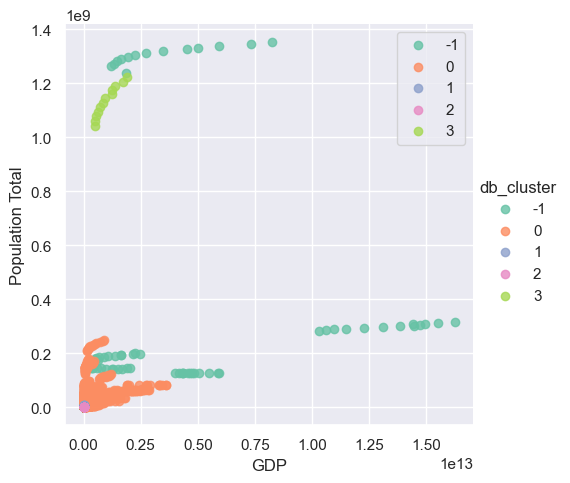

In [76]:
plt.figure(figsize=(6,4))
sns.lmplot(data=data_db_cluster,x='GDP',y='Population Total',hue='db_cluster',fit_reg=False,palette='Set2')
plt.legend(loc='best')
plt.show()

<b><h2>SUMMARY

In [77]:
comp_matrix={'model':['Agglomeratic','KMeans','DBSCAN'],
              'silhouettte_score':[silhouette_score(data_scaled,agglomerative_clusters),
                                   silhouette_score(data_scaled,km_final_labels),
                                   silhouette_score(data_scaled,db_labels)],
              'DBI(davies_bouldin_score)':[davies_bouldin_score(data_scaled,agglomerative_clusters),
                                          davies_bouldin_score(data_scaled,km_final_labels),
                                          davies_bouldin_score(data_scaled,db_labels)]}
pd.DataFrame(comp_matrix)

model  silhouettte_score  DBI(davies_bouldin_score)
0  Agglomeratic           0.204827                   1.079449
1        KMeans           0.280949                   0.972548
2        DBSCAN           0.200408                   1.671835

<b>KMeans Clustering gives highest Silhouette Score and lowest Davies-Bouldin Index, in our case we can choose KMeans clustering as the best one.

--------------------------------------------------------------------------------------------------------------------------------------------------------

<b><h1>MODEL EVALUATION

In [78]:
data_km_cluster

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
1             13924930    0.050000                    26.0        7499.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2699             32427    0.022715                    26.0       14338.0   
2700         313873685    0.013000                     5.0     2132446.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
1     9.129595e+09           0.03400               22.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
...            ...               ...                ...             ...   
2699  1.507975e+10           0.06417              193.0             0.1   
2700  1.624460e+13           0.17900             8895.0             0.8   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
1                    0.0          0.499000           0.025             0.324   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
...                  ...               ...             ...               ...   
2699                 0.5          0.623481           0.052             0.911   
2700                 1.0          0.667000           0.136             0.811   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  km_cluster  
0        1.020000e+08           4  
1        3.400000e+07           0  
2        7.700000e+07           0  
3        2.270000e+08           0  
4        2.300000e+07           0  
...               ...         ...  
2699     6.885000e+08           4  
2700     2.000920e+11           3  
2701     2.222000e+09           1  
2702  

In [79]:
data_km_cluster['km_cluster'].value_counts()

4    1338
0     799
1     528
2      26
3      13
Name: km_cluster, dtype: int64

In [80]:
#X and Y 
x = data_km_cluster.drop(['km_cluster'],axis=1)
y = data_km_cluster['km_cluster']

In [81]:
x

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             31719449    0.020000                    26.0       26998.0   
1             13924930    0.050000                    26.0        7499.0   
2              6949366    0.043000                    26.0        1983.0   
3              1755375    0.027000                    26.0        1836.0   
4             11607944    0.046000                    26.0       14338.0   
...                ...         ...                     ...           ...   
2699             32427    0.022715                    26.0       14338.0   
2700         313873685    0.013000                     5.0     2132446.0   
2701           3395253    0.015000                     7.0       14338.0   
2702          29954782    0.020000                   144.0       14338.0   
2703            105275    0.011000                    26.0       14338.0   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     5.479006e+10           0.03500               60.0             0.0   
1     9.129595e+09           0.03400               22.0             0.0   
2     2.359122e+09           0.04300               15.0             0.0   
3     5.788312e+09           0.04700              152.0             0.0   
4     2.610959e+09           0.05100               12.0             0.0   
...            ...               ...                ...             ...   
2699  1.507975e+10           0.06417              193.0             0.1   
2700  1.624460e+13           0.17900             8895.0             0.8   
2701  5.000435e+10           0.08900             1308.0             0.5   
2702  3.812862e+11           0.04600              593.0             0.5   
2703  1.507975e+10           0.06417              193.0             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                0.120                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                0.120                    52.0                  49.0   
...                ...                     ...                   ...   
2699             0.120                    75.0                  69.0   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0.164                    78.0                  72.0   
2703             0.120                    83.0                  76.0   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0                    0.0          0.619000           0.039             0.599   
1                    0.0          0.499000           0.025             0.324   
2                    0.0          0.517000           0.029             0.383   
3                    0.1          0.587000           0.029             0.532   
4                    0.0          0.505000           0.028             0.178   
...                  ...               ...             ...               ...   
2699                 0.5          0.623481           0.052             0.911   
2700                 1.0          0.667000           0.136             0.811   
2701                 1.5          0.639000           0.140             0.948   
2702                 1.0          0.652000           0.060             0.889   
2703                 0.5          0.641000           0.152             0.949   

      Tourism Inbound  
0        1.020000e+08  
1        3.400000e+07  
2        7.700000e+07  
3        2.270000e+08  
4        2.300000e+07  
...               ...  
2699     6.885000e+08  
2700     2.000920e+11  
2701     2.222000e+09  
2702     9.040000e+08  
2703     6.885000e+08  

[2704 rows x 16 columns]

In [82]:
y

0       4
1       0
2       0
3       0
4       0
       ..
2699    4
2700    3
2701    1
2702    4
2703    4
Name: km_cluster, Length: 2704, dtype: int32

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote , y_smote = smote.fit_resample(x , y)

In [84]:
y_smote.value_counts()

4    1338
0    1338
2    1338
1    1338
3    1338
Name: km_cluster, dtype: int64

In [85]:
x_scaled = scaler.fit_transform(x_smote)
x_scaled

array([[-0.60416318,  0.01749868, -0.10580831, ..., -0.98933595,
         0.07932581, -0.63544428],
       [-0.64207689,  2.98246944, -0.10580831, ..., -1.28590813,
        -1.07151322, -0.63666784],
       [-0.65693931,  2.29064293, -0.10580831, ..., -1.20117323,
        -0.82460594, -0.63589411],
       ...,
       [-0.00723103, -0.67432784, -0.7236559 , ...,  1.01032564,
         0.95925347,  2.72012646],
       [-0.01558682, -0.66202217, -0.71999264, ...,  0.94110376,
         0.95031605,  2.25462849],
       [-0.05740325, -0.57549548, -0.35872234, ...,  0.79009712,
         0.89779786,  1.37679977]])

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_smote,test_size=0.2,random_state=101)

In [87]:
x_train

array([[-0.67052405, -0.81326518, -0.22306784, ...,  0.81496585,
         0.45292574, -0.62219558],
       [-0.63284032,  1.59881642,  0.30609009, ..., -1.1799895 ,
        -0.37682493, -0.63495845],
       [-0.67060699, -0.18016604, 19.54762941, ..., -0.41737532,
         0.34297257, -0.63585813],
       ...,
       [-0.67073889, -0.7731602 , -0.10580831, ...,  1.23495539,
         1.21342536, -0.57185527],
       [-0.64910636, -0.7731602 , -0.75307722, ...,  1.82809975,
         1.65283663, -0.4146821 ],
       [ 1.95176933, -0.31449204, -0.02249338, ..., -0.48737581,
        -0.96432197, -0.32255394]])

In [88]:
x_test

array([[ 1.65655747,  0.44869802,  0.31591444, ..., -0.84873822,
        -1.2339476 , -0.55291749],
       [-0.49623133, -1.16848963, -0.16465094, ...,  2.29414175,
         0.64846802,  0.18210812],
       [-0.66056308,  0.70932519, -0.10580831, ..., -0.98933595,
        -0.11736304, -0.63485049],
       ...,
       [-0.05694144, -0.57549548, -0.32591187, ...,  0.79009712,
         0.89850604,  1.22226223],
       [-0.66359898, -0.57549548, -0.10580831, ...,  0.66299476,
         1.51892081, -0.59254779],
       [ 1.92046611, -0.22418634, -0.01430003, ..., -0.54207314,
        -1.0366092 , -0.37430957]])

In [89]:
y_train

3540    1
1676    0
2697    4
4192    2
5727    3
       ..
599     4
5695    3
1361    1
1547    1
4959    2
Name: km_cluster, Length: 5352, dtype: int32

In [90]:
y_test

4376    2
1350    1
607     4
4520    2
801     4
       ..
5114    2
5617    3
5580    3
611     4
4118    2
Name: km_cluster, Length: 1338, dtype: int32

In [91]:
print('X_Train',x_train.shape)
print('X_Test',x_test.shape)
print('Y_Train',y_train.shape)
print('Y_Test',y_test.shape)

X_Train (5352, 16)
X_Test (1338, 16)
Y_Train (5352,)
Y_Test (1338,)


<b><h2>DECISION TREE CLASSIFIER

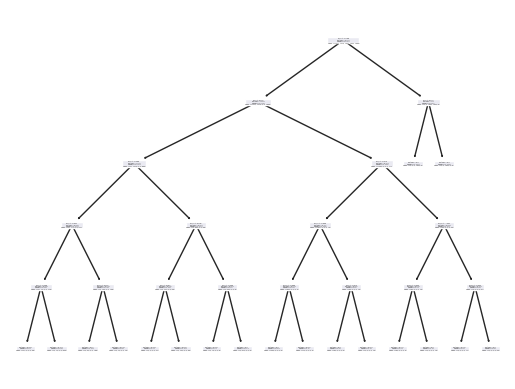

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=5)
DTC.fit(x_train,y_train)
tree.plot_tree(DTC);

In [93]:
y_pred = DTC.predict(x_test)
y_pred

array([2, 1, 4, ..., 3, 4, 2])

In [94]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
yt = lb.fit_transform(y_test)
yp = lb.fit_transform(y_pred)
n_classes = len(lb.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

Confusion Matrix : 
 [[255   0   0   0   6]
 [  0 242   0   0  18]
 [  0   0 284   0   0]
 [  0   0   0 255   0]
 [ 12  13   0   0 253]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       261
           1       0.95      0.93      0.94       260
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       255
           4       0.91      0.91      0.91       278

    accuracy                           0.96      1338
   macro avg       0.96      0.96      0.96      1338
weighted avg       0.96      0.96      0.96      1338



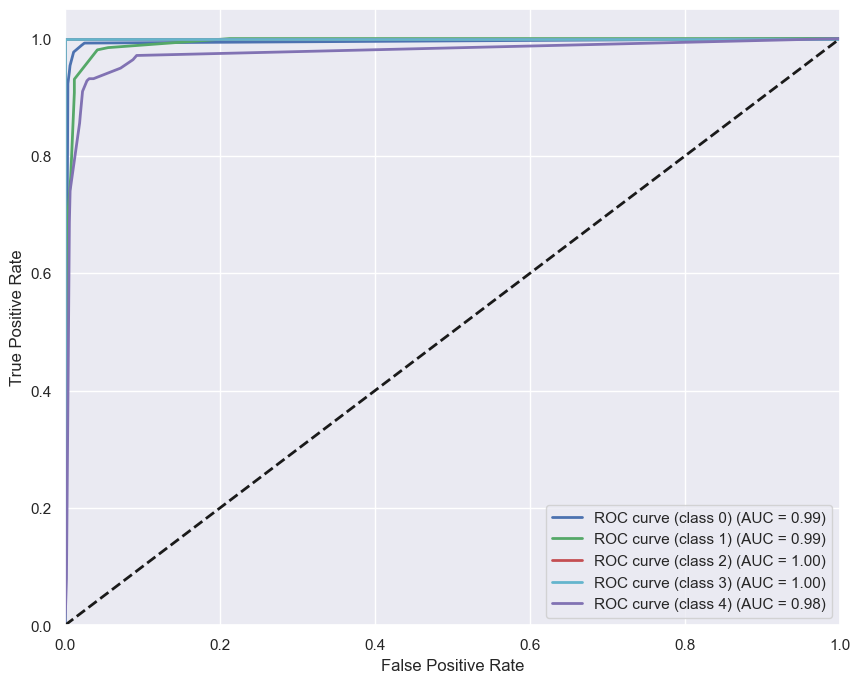

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,auc
print('Confusion Matrix :','\n',confusion_matrix(y_test,y_pred))
print('=================================================================================================================')
print('Classification Report :','\n',classification_report(y_test,y_pred))
print('=================================================================================================================')
for i in range(n_classes):
    fpr[i] , tpr[i] , threshold = roc_curve(yt[:,i],DTC.predict_proba(x_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

<b><h2>RANDOM FOREST CLASSIFIER

In [96]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10,max_features=5,criterion='entropy',random_state=15)
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=10,
                       random_state=15)

In [97]:
y_pred_rfc = RFC.predict(x_test)
y_pred_rfc

array([2, 1, 4, ..., 3, 4, 2])

Confusion Matrix : 
 [[257   0   0   0   4]
 [  0 259   0   0   1]
 [  0   0 284   0   0]
 [  0   0   0 255   0]
 [  6  11   0   0 261]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       261
           1       0.96      1.00      0.98       260
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       255
           4       0.98      0.94      0.96       278

    accuracy                           0.98      1338
   macro avg       0.98      0.98      0.98      1338
weighted avg       0.98      0.98      0.98      1338



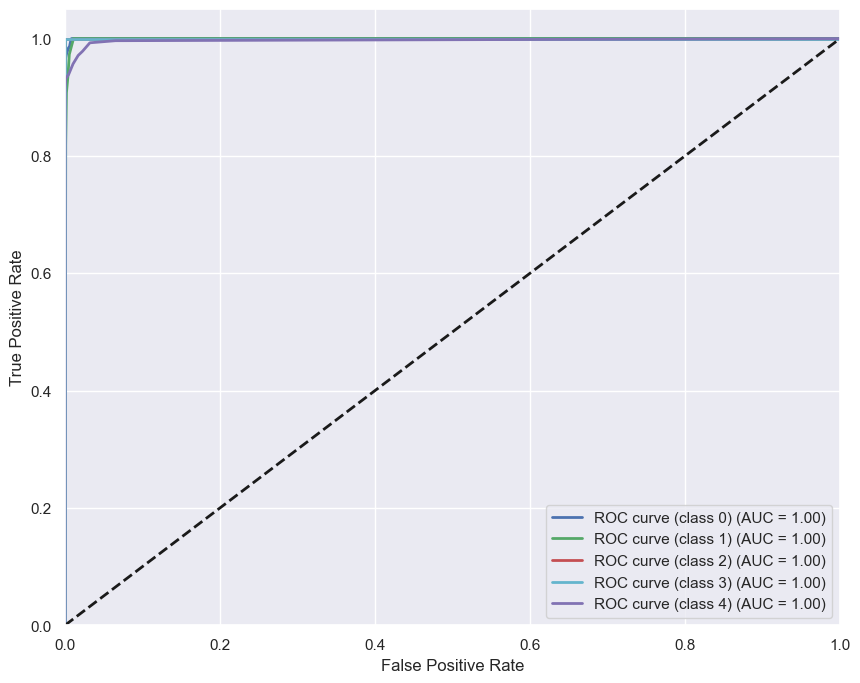

In [98]:
lb_2 = LabelBinarizer()
yt_2 = lb_2.fit_transform(y_test)
yp_2 = lb_2.fit_transform(y_pred_rfc)
n_classes_2 = len(lb_2.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

print('Confusion Matrix :','\n',confusion_matrix(y_test,y_pred_rfc))
print('=================================================================================================================')
print('Classification Report :','\n',classification_report(y_test,y_pred_rfc))
print('=================================================================================================================')
for i in range(n_classes_2):
    fpr[i] , tpr[i] , threshold = roc_curve(yt_2[:,i],RFC.predict_proba(x_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes_2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

<b><h2>K-NEAREST NEIGHBORS

In [99]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [100]:
y_pred_knn= KNN.predict(x_test)
y_pred_knn

array([2, 1, 4, ..., 3, 4, 2])

Confusion Matrix : 
 [[256   0   0   0   5]
 [  0 257   0   0   3]
 [  0   0 284   0   0]
 [  0   0   0 255   0]
 [  4   5   0   0 269]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       261
           1       0.98      0.99      0.98       260
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       255
           4       0.97      0.97      0.97       278

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



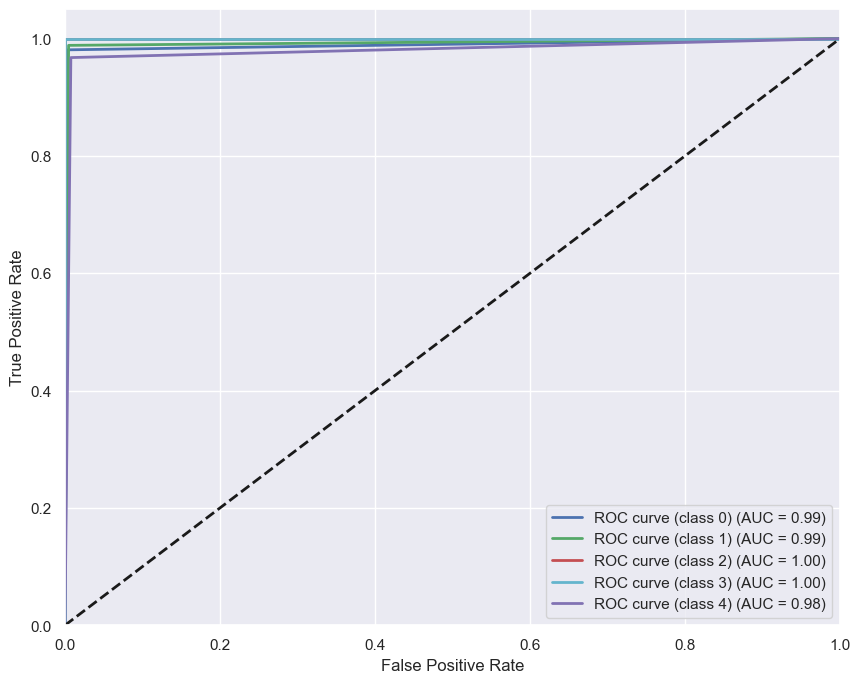

In [101]:
lb_3 = LabelBinarizer()
yt_3 = lb_3.fit_transform(y_test)
yp_3 = lb_3.fit_transform(y_pred_knn)
n_classes_3 = len(lb_3.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

print('Confusion Matrix :','\n',confusion_matrix(y_test,y_pred_knn))
print('=================================================================================================================')
print('Classification Report :','\n',classification_report(y_test,y_pred_knn))
print('=================================================================================================================')
for i in range(n_classes_3):
    fpr[i] , tpr[i] , threshold = roc_curve(yt_3[:,i],KNN.predict_proba(x_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes_3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

<b><h2>SUPPORT VECTOR MACHINE

In [102]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train,y_train)

SVC()

In [103]:
y_pred_svm= SVM.predict(x_test)
y_pred_svm

array([2, 1, 4, ..., 3, 4, 2])

Confusion Matrix : 
 [[260   0   0   0   1]
 [  0 257   0   0   3]
 [  0   0 284   0   0]
 [  0   0   0 255   0]
 [  3   5   0   0 270]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       261
           1       0.98      0.99      0.98       260
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       255
           4       0.99      0.97      0.98       278

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



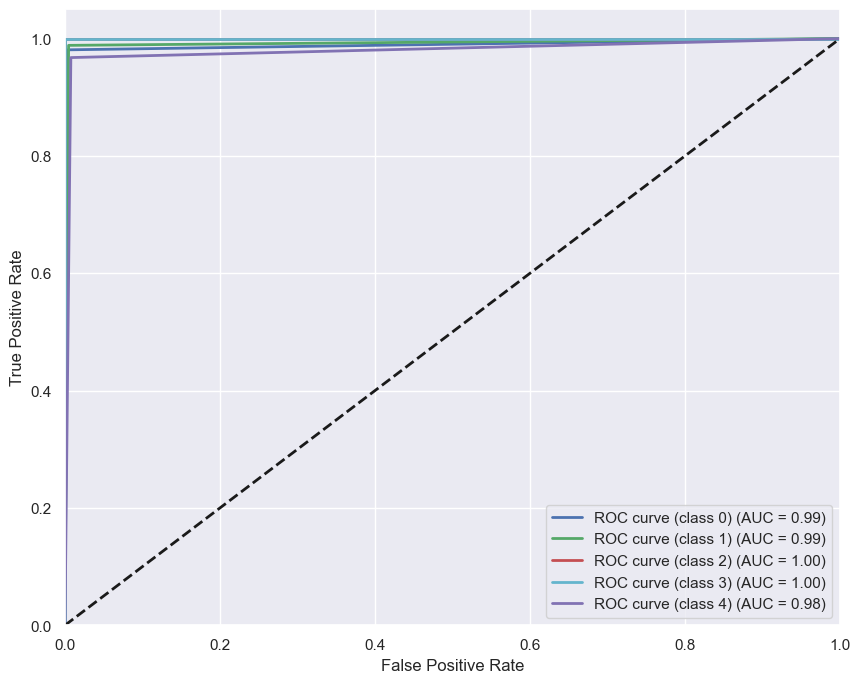

In [104]:
lb_4 = LabelBinarizer()
yt_4 = lb_4.fit_transform(y_test)
yp_4 = lb_4.fit_transform(y_pred_svm)
n_classes_4 = len(lb_4.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

print('Confusion Matrix :','\n',confusion_matrix(y_test,y_pred_svm))
print('=================================================================================================================')
print('Classification Report :','\n',classification_report(y_test,y_pred_svm))
print('=================================================================================================================')
for i in range(n_classes_4):
    fpr[i] , tpr[i] , threshold = roc_curve(yt_3[:,i],KNN.predict_proba(x_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes_4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

<b><h1>SUMMARY

In [105]:
from sklearn.metrics import accuracy_score
classification={'Model':['Decision Tree','Random Forest','KNN','SVM'],
              'Test_score':[accuracy_score(yt,yp),accuracy_score(yt_2,yp_2),accuracy_score(yt_3,yp_3),accuracy_score(yt_4,yp_4)]}
pd.DataFrame(classification)

Model  Test_score
0  Decision Tree    0.963378
1  Random Forest    0.983558
2            KNN    0.987294
3            SVM    0.991031

<b>SVM Model gives best results out of all the other classification model, we can consider it has our final model

----------------------------------------------------------------------------------------------------------------------------------------

<b><h2>DEPLOYMENT

In [108]:
import pickle
pickle.dump(km_final,open(r'C:\Users\Narsing\Downloads\Assigments data science\Project P302 DS G4\model.sav','wb'))

In [109]:
data_5.describe()

Population Total   Birth Rate  Days to Start Business  Energy Usage  \
count      2.704000e+03  2704.000000             2704.000000  2.704000e+03   
mean       3.145729e+07     0.022715               34.894601  5.585961e+04   
std        1.242894e+08     0.011086               46.177780  2.132565e+05   
min        1.887600e+04     0.007000                1.000000  8.000000e+00   
25%        8.783360e+05     0.013000               20.000000  7.851750e+03   
50%        5.800324e+06     0.021000               26.000000  1.433800e+04   
75%        2.014089e+07     0.030000               34.250000  2.347650e+04   
max        1.350695e+09     0.053000              694.000000  2.727728e+06   

                GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
count  2.704000e+03       2704.000000        2704.000000     2704.000000   
mean   2.445336e+11          0.064170         731.872411        0.230806   
std    1.087172e+12          0.024774        1400.121122        0.253983   
min    6.310127e+07          0.008000           2.000000        0.000000   
25%    4.113748e+09          0.048000          58.000000        0.000000   
50%    1.507975e+10          0.064000         193.000000        0.100000   
75%    9.101825e+10          0.076000         551.250000        0.400000   
max    1.624460e+13          0.225000        9908.000000        1.000000   

       Lending Interest  Life Expectancy Female  Life Expectancy Male  \
count       2704.000000             2704.000000           2704.000000   
mean           0.139539               71.352441             66.589497   
std            0.143847               10.469114              9.167741   
min            0.005000               39.000000             37.000000   
25%            0.097750               65.000000             61.000000   
50%            0.120000               75.000000             69.000000   
75%            0.149250               79.000000             73.000000   
max            4.965000               87.000000             88.000000   

       Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
count         2704.000000       2704.000000     2704.000000       2704.000000   
mean             0.573299          0.623481        0.071718          0.562953   
std              0.460136          0.066765        0.047844          0.244712   
min              0.000000          0.474000        0.003000          0.082000   
25%              0.200000          0.565000        0.034000          0.357750   
50%              0.500000          0.631000        0.052000          0.562953   
75%              0.900000          0.673000        0.105000          0.763000   
max              2.900000          0.858000        0.244000          1.000000   

       Tourism Inbound  
count     2.704000e+03  
mean      4.360806e+09  
std       1.295591e+10  
min       7.000000e+05  
25%       1.860000e+08  
50%       6.885000e+08  
75%       2.648000e+09  
max       2.000920e+11

In [110]:
data_scaled_2 = pd.DataFrame(data_scaled,columns=data_5.columns)

In [111]:
data_scaled_2

Population Total  Birth Rate  Days to Start Business  Energy Usage  \
0             0.002110   -0.244939               -0.192652     -0.135363   
1            -0.141087    2.461670               -0.192652     -0.226814   
2            -0.197221    1.830128               -0.192652     -0.252684   
3            -0.239018    0.386604               -0.192652     -0.253374   
4            -0.159732    2.100789               -0.192652     -0.194739   
...                ...         ...                     ...           ...   
2699         -0.252883    0.000000               -0.192652     -0.194739   
2700          2.272669   -0.876481               -0.647500      9.739309   
2701         -0.225822   -0.696040               -0.604181     -0.194739   
2702         -0.012091   -0.244939                2.363162     -0.194739   
2703         -0.252297   -1.056921               -0.192652     -0.194739   

            GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
0     -0.174562     -1.177630e+00          -0.479956       -0.908914   
1     -0.216569     -1.218002e+00          -0.507102       -0.908914   
2     -0.222797     -8.546543e-01          -0.512102       -0.908914   
3     -0.219643     -6.931666e-01          -0.414235       -0.908914   
4     -0.222566     -5.316789e-01          -0.514245       -0.908914   
...         ...               ...                ...             ...   
2699  -0.211095     -5.602730e-16          -0.384947       -0.515114   
2700  14.719861      4.635928e+00           5.831379        2.241482   
2701  -0.178964      1.002454e+00           0.411560        1.060084   
2702   0.125811     -7.335385e-01          -0.099204        1.060084   
2703  -0.211095     -5.602730e-16          -0.384947        0.666284   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0            -0.274918               -0.033671              0.044785   
1             6.205386               -2.326553             -2.464476   
2            -0.135856               -1.371185             -1.482591   
3             0.107503               -1.848869             -1.918984   
4            -0.135856               -1.848869             -1.918984   
...                ...                     ...                   ...   
2699         -0.135856                0.348476              0.262982   
2700         -0.740777                0.921696              1.026670   
2701         -0.191481                0.826160              0.808473   
2702          0.170081                0.635086              0.590277   
2703         -0.135856                1.112770              1.026670   

      Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
0              -1.246165         -0.067135       -0.683981          0.147333   
1              -1.246165         -1.864811       -0.976654         -0.976646   
2              -1.246165         -1.595159       -0.893033         -0.735502   
3              -1.028797         -0.546515       -0.893033         -0.126509   
4              -1.246165         -1.774927       -0.913938         -1.573377   
...                  ...               ...             ...               ...   
2699           -0.159328          0.000000       -0.412213          1.422539   
2700            0.927509          0.651935        1.343825          1.013819   
2701            2.014346          0.232477        1.427446          1.573765   
2702            0.927509          0.427225       -0.244971          1.332620   
2703           -0.159328          0.262438        1.678308          1.577852   

      Tourism Inbound  
0           -0.328776  
1           -0.334026  
2           -0.330706  
3           -0.319126  
4           -0.334875  
...               ...  
2699        -0.283499  
2700        15.110276  
2701        -0.165114  
2702        -0.266862  
2703        -0.283499  

[2704 rows x 16 columns]

In [112]:
data_scaled_2.describe()

Population Total    Birth Rate  Days to Start Business  Energy Usage  \
count      2.704000e+03  2.704000e+03            2.704000e+03  2.704000e+03   
mean      -1.839423e-17 -9.985438e-17           -4.073008e-17  1.905116e-17   
std        1.000185e+00  1.000185e+00            1.000185e+00  1.000185e+00   
min       -2.529921e-01 -1.417802e+00           -7.341382e-01 -2.619472e-01   
25%       -2.460758e-01 -8.764806e-01           -3.226087e-01 -2.251596e-01   
50%       -2.064675e-01 -1.547182e-01           -1.926521e-01 -1.947387e-01   
75%       -9.106566e-02  6.572645e-01           -1.396169e-02 -1.518786e-01   
max        1.061621e+01  2.732331e+00            1.427586e+01  1.253122e+01   

               GDP  Health Exp % GDP  Health Exp/Capita  Internet Usage  \
count  2704.000000      2.704000e+03       2.704000e+03    2.704000e+03   
mean      0.000000     -4.729944e-16      -1.051099e-17   -2.102197e-17   
std       1.000185      1.000185e+00       1.000185e+00    1.000185e+00   
min      -0.224910     -2.267672e+00      -5.213888e-01   -9.089136e-01   
25%      -0.221183     -6.527947e-01      -4.813848e-01   -9.089136e-01   
50%      -0.211095     -6.843842e-03      -3.849468e-01   -5.151142e-01   
75%      -0.141232      4.776193e-01      -1.290287e-01    6.662842e-01   
max      14.719861      6.493036e+00       6.555022e+00    3.029081e+00   

       Lending Interest  Life Expectancy Female  Life Expectancy Male  \
count      2.704000e+03            2.704000e+03          2.704000e+03   
mean      -2.207307e-16            1.891978e-16          1.471538e-16   
std        1.000185e+00            1.000185e+00          1.000185e+00   
min       -9.354642e-01           -3.090847e+00         -3.228164e+00   
25%       -2.905626e-01           -6.068915e-01         -6.098046e-01   
50%       -1.358558e-01            3.484759e-01          2.629818e-01   
75%        6.752289e-02            7.306229e-01          6.993750e-01   
max        3.355199e+01            1.494917e+00          2.335849e+00   

       Mobile Phone Usage  Population 15-64  Population 65+  Population Urban  \
count        2.704000e+03      2.704000e+03    2.704000e+03      2.704000e+03   
mean         1.681758e-16     -4.835054e-16   -1.786868e-16      8.408790e-17   
std          1.000185e+00      1.000185e+00    1.000185e+00      1.000185e+00   
min         -1.246165e+00     -2.239326e+00   -1.436569e+00     -1.965748e+00   
25%         -8.114300e-01     -8.760892e-01   -7.885069e-01     -8.387035e-01   
50%         -1.593277e-01      1.126321e-01   -4.122131e-01      0.000000e+00   
75%          7.101419e-01      7.418184e-01    6.957632e-01      8.176333e-01   
max          5.057490e+00      3.513234e+00    3.601588e+00      1.786299e+00   

       Tourism Inbound  
count      2704.000000  
mean          0.000000  
std           1.000185  
min          -0.336596  
25%          -0.322291  
50%          -0.283499  
75%          -0.132227  
max          15.110276

In [113]:
a = [[-1,0.5,1.25,0.29,10,5,6,3,10,1,2,5,3,3,1.5,15]]

In [114]:
z = km_final.predict(a)
z

array([3])

In [116]:
pickle.dump(SVM,open(r'C:\Users\Narsing\Downloads\Assigments data science\Project P302 DS G4\model_2.sav','wb'))